# LiDAR Data Visualization

This notebook demonstrates how to visualize LAS files effectively with proper memory management.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import laspy
import os
from mpl_toolkits.mplot3d import Axes3D

# Set style for better visuals
plt.style.use('bmh')

## Load LiDAR Data

First, we'll load the LAS file into a pandas DataFrame with proper handling

In [33]:
def load_las_to_dataframe(filename, max_points=None):
    """Load LAS file data into a pandas DataFrame with memory management."""
    print(f"Loading LAS file: {filename}...")
    
    # Check if file exists
    if not os.path.exists(filename):
        raise FileNotFoundError(f"File {filename} not found.")
    
    # Read the LAS file
    las = laspy.read(filename)
    
    # Get total number of points
    total_points = len(las.points)
    print(f"Total points in file: {total_points:,}")
    
    # Get available dimensions
    print(f"Available dimensions: {list(las.point_format.dimension_names)}")
    
    # Determine how many points to process
    if max_points and max_points < total_points:
        # Create an array of indices to sample randomly
        indices = np.random.choice(total_points, max_points, replace=False)
        print(f"Sampling {max_points:,} points for processing")
    else:
        indices = slice(None)  # All points
        print("Processing all points")
    
    # Extract point data
    data = {
        'X': las.x[indices],
        'Y': las.y[indices],
        'Z': las.z[indices],
        'intensity': las.intensity[indices],
    }
    
    # Add other available fields if they exist
    for field in ['classification', 'return_number', 'number_of_returns',
                  'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time']:
        try:
            data[field] = getattr(las, field)[indices]
        except (AttributeError, KeyError) as e:
            print(f"Field '{field}' not available: {e}")
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    print(f"DataFrame created with {len(df):,} points")
    return df

In [34]:
# Load the data (adjust max_points based on your computer's capabilities)
filename = "../data/2743_1234.las"
df = load_las_to_dataframe(filename, max_points=2_000_000)

# Display the first few rows
df.head()

Loading LAS file: ../data/2743_1234.las...
Total points in file: 20,985,999
Available dimensions: ['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time']
Sampling 2,000,000 points for processing
DataFrame created with 2,000,000 points


,X,Y,Z,intensity,classification,return_number,number_of_returns,scan_angle_rank,user_data,point_source_id,gps_time
0,"[2743200.47, 2743003.94, 2743722.21, 2743295.6...","[1234606.6, 1234803.03, 1234970.3, 1234913.8, ...","[2058.45, 2067.27, 2214.89, 2171.05, 2163.98, ...",276,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-30,58,1443,1.923519e+08
1,"[2743200.47, 2743003.94, 2743722.21, 2743295.6...","[1234606.6, 1234803.03, 1234970.3, 1234913.8, ...","[2058.45, 2067.27, 2214.89, 2171.05, 2163.98, ...",436,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-19,56,1446,1.923503e+08
2,"[2743200.47, 2743003.94, 2743722.21, 2743295.6...","[1234606.6, 1234803.03, 1234970.3, 1234913.8, ...","[2058.45, 2067.27, 2214.89, 2171.05, 2163.98, ...",503,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17,55,1445,1.923508e+08
3,"[2743200.47, 2743003.94, 2743722.21, 2743295.6...","[1234606.6, 1234803.03, 1234970.3, 1234913.8, ...","[2058.45, 2067.27, 2214.89, 2171.05, 2163.98, ...",416,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,60,1445,1.923508e+08
4,"[2743200.47, 2743003.94, 2743722.21, 2743295.6...","[1234606.6, 1234803.03, 1234970.3, 1234913.8, ...","[2058.45, 2067.27, 2214.89, 2171.05, 2163.98, ...",535,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-25,59,1446,1.923503e+08


## Explore Basic Statistics

In [35]:
# Display basic statistics
df.describe()

,intensity,scan_angle_rank,user_data,point_source_id,gps_time
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,7.435236e+02,-3.895710e-01,5.470000e+01,1.453007e+03,1.925264e+08
std,4.573786e+03,1.722953e+01,6.191630e+00,9.412920e+01,1.741890e+06
min,3.000000e+00,-3.000000e+01,0.000000e+00,1.441000e+03,1.923503e+08
25%,3.110000e+02,-1.600000e+01,5.300000e+01,1.443000e+03,1.923514e+08
50%,3.980000e+02,0.000000e+00,5.400000e+01,1.444000e+03,1.923514e+08
75%,5.020000e+02,1.400000e+01,5.600000e+01,1.444000e+03,1.923519e+08
max,6.553500e+04,3.000000e+01,2.550000e+02,2.391000e+03,2.098856e+08


## Create Comprehensive Visualization

Now let's create a multi-panel visualization that shows different aspects of the LiDAR data:

In [47]:
def visualize_lidar(df_input, sample_size=1000000):
    """Create comprehensive visualizations of LiDAR data."""
    # Sample the data if needed
    if len(df_input) > sample_size:
        print(f"Sampling {sample_size:,} points for visualization")
        df_viz = df_input.sample(sample_size, random_state=42)
    else:
        df_viz = df_input.copy()
        
    print(f"Visualizing {len(df_viz):,} points")
    
    # Check if the data has nested structure and flatten it
    needs_flattening = False
    for i in range(min(10, len(df_viz))):
        if isinstance(df_viz['X'].iloc[i], (list, np.ndarray)):
            needs_flattening = True
            break
    
    if needs_flattening:
        print("Detected nested arrays, flattening data for visualization...")
        # Extract individual points from nested arrays
        x_vals, y_vals, z_vals = [], [], []
        intensity_vals, class_vals = [], []
        
        for _, row in df_viz.iterrows():
            if isinstance(row['X'], (list, np.ndarray)):
                # Handle single or double nested arrays
                for j in range(len(row['X'])):
                    x_val = row['X'][j]
                    y_val = row['Y'][j]
                    z_val = row['Z'][j]
                    
                    # Handle double nested arrays if present
                    x = x_val[0] if isinstance(x_val, (list, np.ndarray)) else x_val
                    y = y_val[0] if isinstance(y_val, (list, np.ndarray)) else y_val
                    z = z_val[0] if isinstance(z_val, (list, np.ndarray)) else z_val
                    
                    x_vals.append(float(x))
                    y_vals.append(float(y))
                    z_vals.append(float(z))
                    intensity_vals.append(row['intensity'])
                    
                    # Include classification if available
                    if 'classification' in row:
                        if isinstance(row['classification'], (list, np.ndarray)):
                            if j < len(row['classification']):
                                class_vals.append(row['classification'][j])
                            else:
                                class_vals.append(row['classification'][0])
                        else:
                            class_vals.append(row['classification'])
            else:
                # Handle scalar values
                x_vals.append(float(row['X']))
                y_vals.append(float(row['Y']))
                z_vals.append(float(row['Z']))
                intensity_vals.append(row['intensity'])
                if 'classification' in row:
                    class_vals.append(row['classification'])
        
        # Create a new dataframe with flattened values
        plot_data = {
            'X': x_vals,
            'Y': y_vals,
            'Z': z_vals,
            'intensity': intensity_vals
        }
        
        if class_vals:
            plot_data['classification'] = class_vals
            
        df_plot = pd.DataFrame(plot_data)
    else:
        df_plot = df_viz
    
    # Create the figure and subplots using subplot2grid in a 3x3 layout
    fig = plt.figure(figsize=(18, 15))
    
    # Left column: 3D scatter (spanning all 3 rows)
    ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1, projection='3d')
    # Middle column: 2D scatter (X vs Y), spanning all 3 rows
    ax2 = plt.subplot2grid((3, 3), (0, 1), rowspan=3, colspan=1)
    # Top-right: 2D scatter (X vs Z)
    ax3 = plt.subplot2grid((3, 3), (0, 2))
    # Middle-right: Histogram of intensity
    ax4 = plt.subplot2grid((3, 3), (1, 2))
    # Bottom-right: Histogram of gps_time or classification
    ax5 = plt.subplot2grid((3, 3), (2, 2))
    
    # --- ax1: 3D Scatter (X, Y, Z) colored by intensity ---
    sample_size_3d = min(100000, len(df_plot))  # Limit points for 3D plot
    if len(df_plot) > sample_size_3d:
        df_3d = df_plot.sample(sample_size_3d, random_state=42)
    else:
        df_3d = df_plot
        
    sc1 = ax1.scatter(df_3d['X'], df_3d['Y'], df_3d['Z'],
                     c=df_3d['intensity'], cmap='viridis', s=1, alpha=0.6)
    ax1.set_title("3D Point Cloud", fontsize=14)
    ax1.set_xlabel("X", fontsize=12)
    ax1.set_ylabel("Y", fontsize=12)
    ax1.set_zlabel("Z", fontsize=12)
    fig.colorbar(sc1, ax=ax1, label='Intensity')
    
    # --- ax2: 2D Scatter (X vs Y) colored by intensity ---
    sc2 = ax2.scatter(df_plot['X'], df_plot['Y'], 
                     c=df_plot['intensity'], cmap='viridis', s=1, alpha=0.6)
    ax2.set_title("Top View (X vs Y)", fontsize=14)
    ax2.set_xlabel("X", fontsize=12)
    ax2.set_ylabel("Y", fontsize=12)
    ax2.set_aspect('equal')  # Equal aspect ratio
    fig.colorbar(sc2, ax=ax2, label='Intensity')
    
    # --- ax3: 2D Scatter (X vs Z) colored by intensity ---
    sc3 = ax3.scatter(df_plot['X'], df_plot['Z'], 
                     c=df_plot['intensity'], cmap='viridis', s=1, alpha=0.6)
    ax3.set_title("Side View (X vs Z)", fontsize=14)
    ax3.set_xlabel("X", fontsize=12)
    ax3.set_ylabel("Z", fontsize=12)
    fig.colorbar(sc3, ax=ax3, label='Intensity')
    
    # --- ax4: Histogram of intensity ---
    ax4.hist(df_plot['intensity'], bins=50, edgecolor='black', color='skyblue', alpha=0.7)
    ax4.set_title("Intensity Distribution", fontsize=14)
    ax4.set_xlabel("Intensity", fontsize=12)
    ax4.set_ylabel("Count", fontsize=12)
    
    # --- ax5: Classification distribution or histogram of gps_time ---
    if 'classification' in df_plot.columns:
        classification_counts = df_plot['classification'].value_counts().sort_index()
        ax5.bar(classification_counts.index, classification_counts.values, 
               edgecolor='black', color='salmon')
        ax5.set_title("Point Classification Distribution", fontsize=14)
        ax5.set_xlabel("Classification", fontsize=12)
        ax5.set_ylabel("Count", fontsize=12)
        # Try to set integer ticks for classification
        if len(classification_counts) <= 20:  # Only if not too many classes
            ax5.set_xticks(classification_counts.index)
    elif 'gps_time' in df_plot.columns:
        ax5.hist(df_plot['gps_time'], bins=50, edgecolor='black', color='salmon', alpha=0.7)
        ax5.set_title("GPS Time Distribution", fontsize=14)
        ax5.set_xlabel("GPS Time", fontsize=12)
        ax5.set_ylabel("Count", fontsize=12)
    
    plt.tight_layout()
    return fig

Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


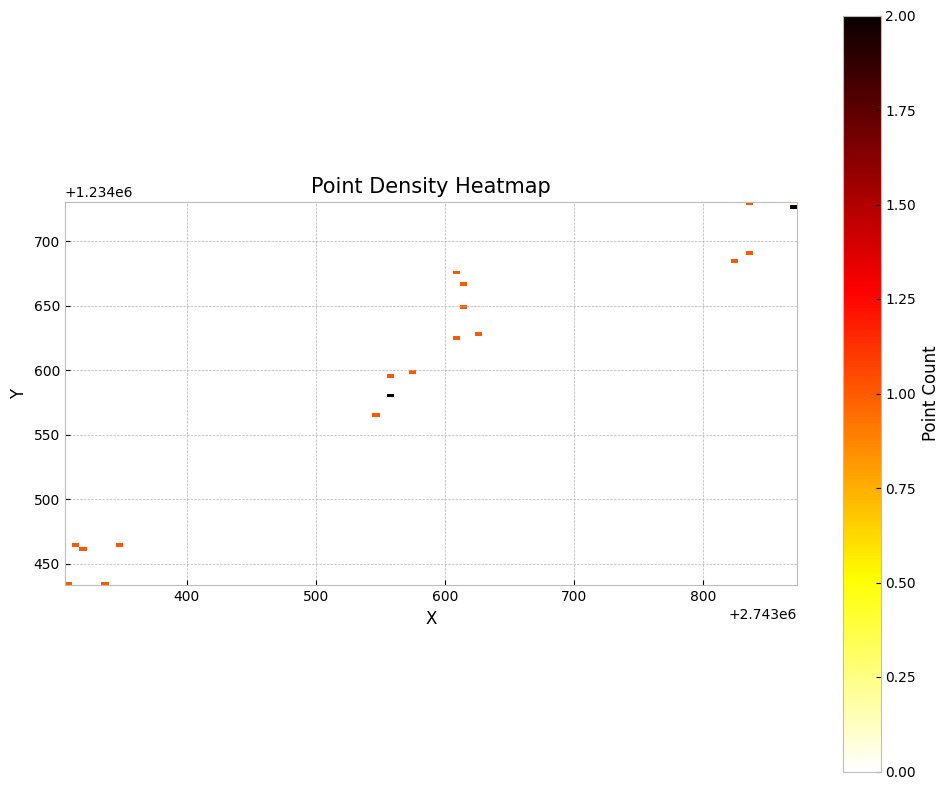

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


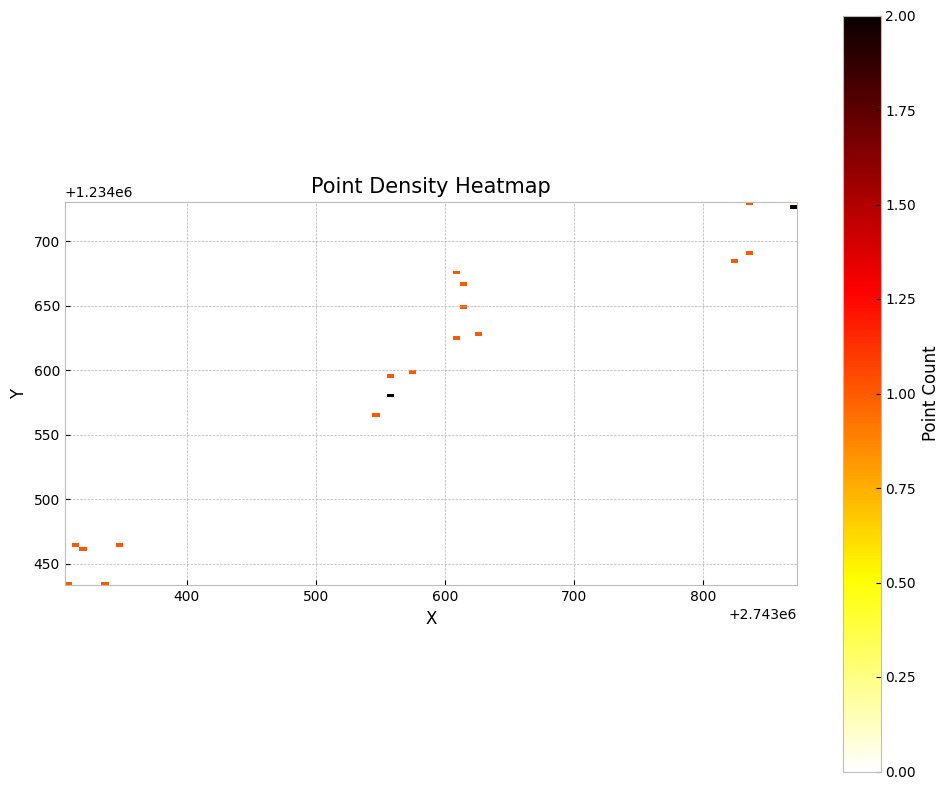

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


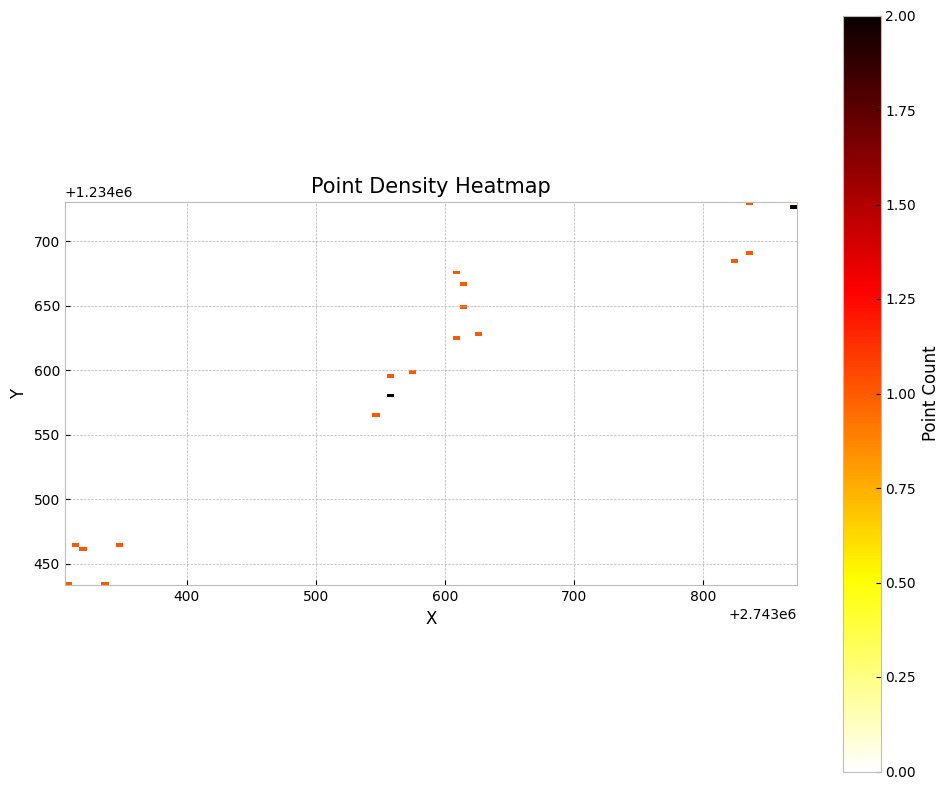

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


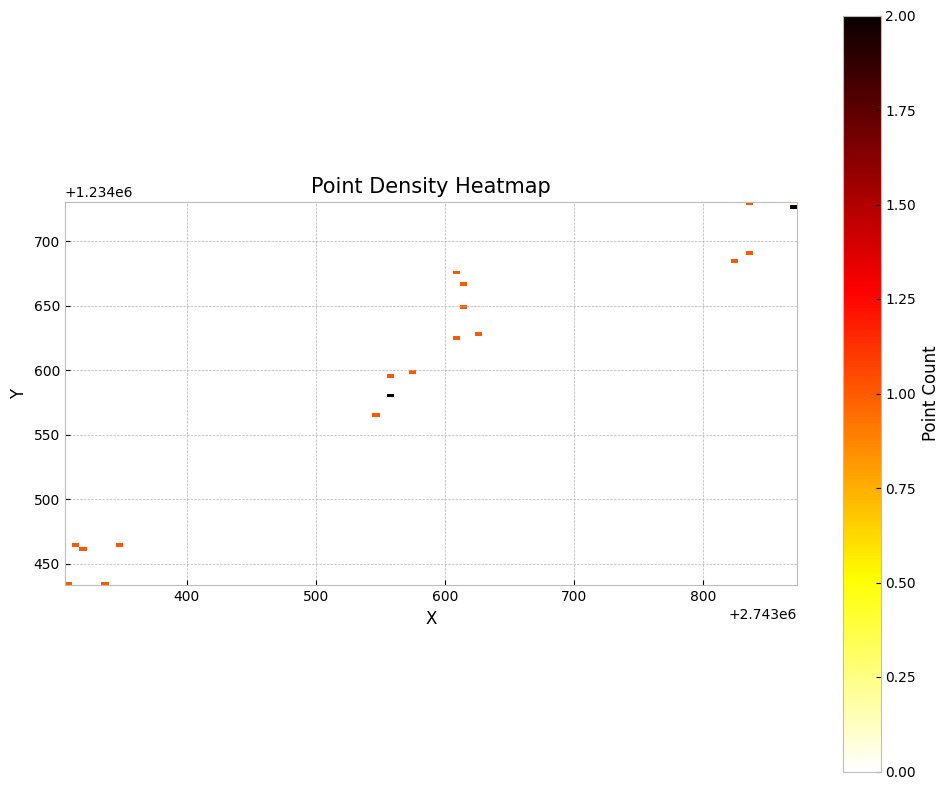

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


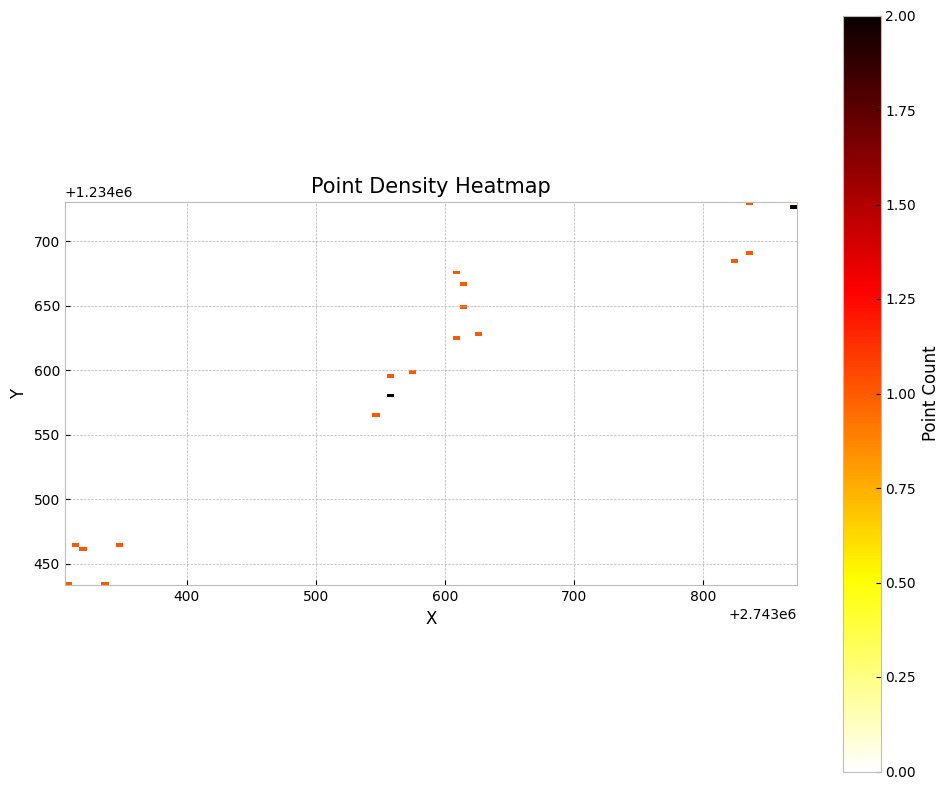

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


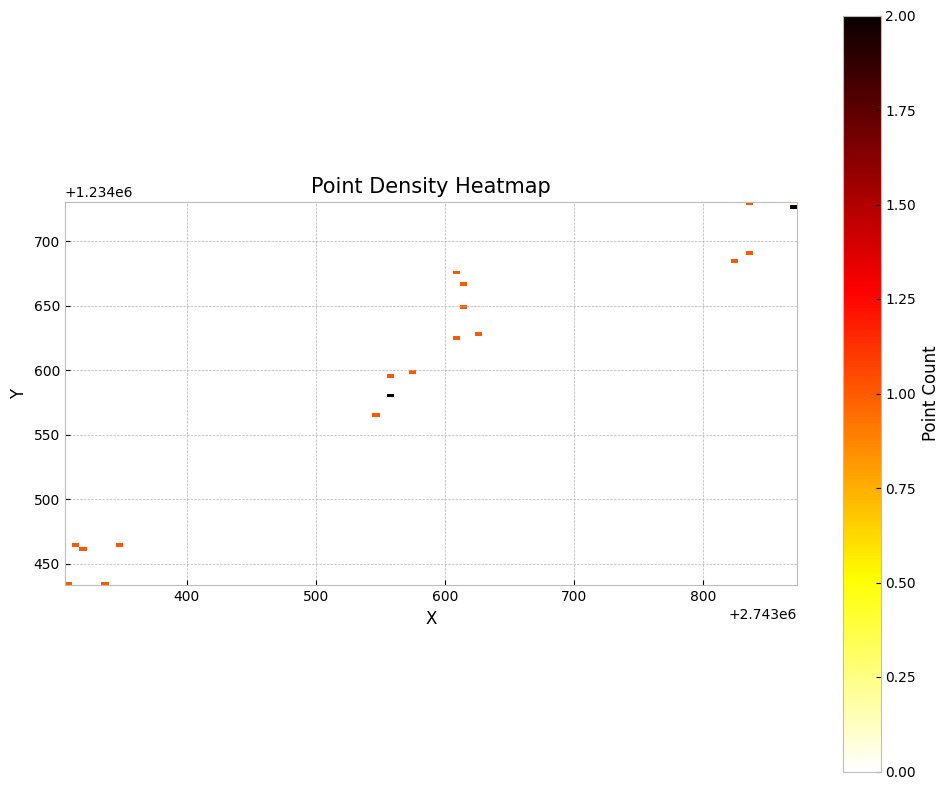

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


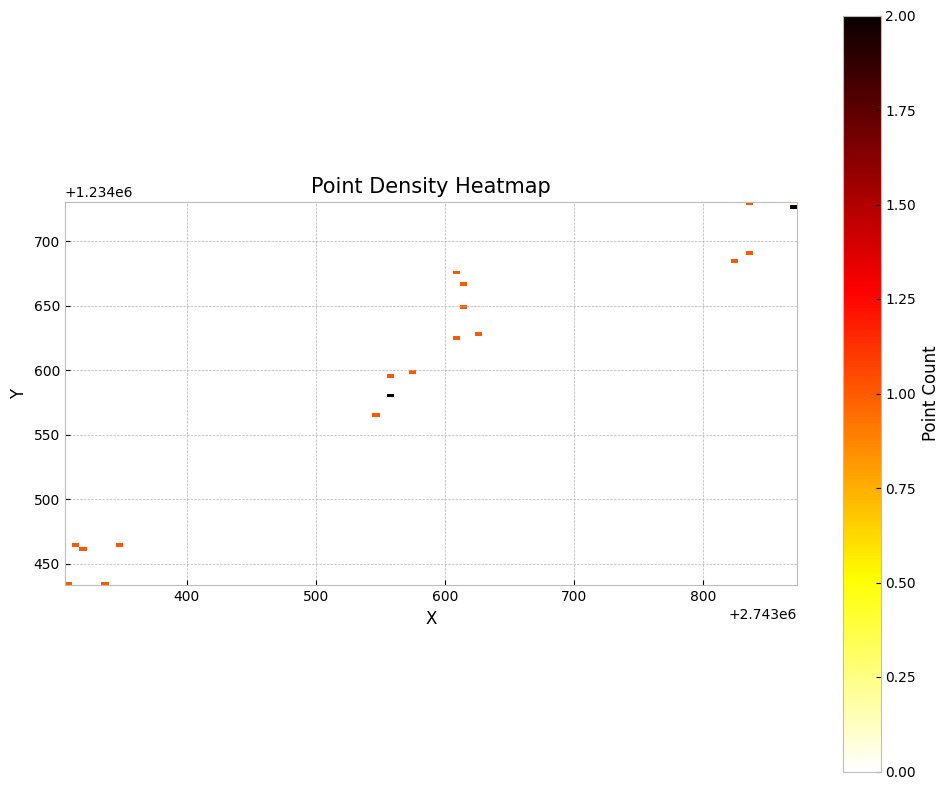

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


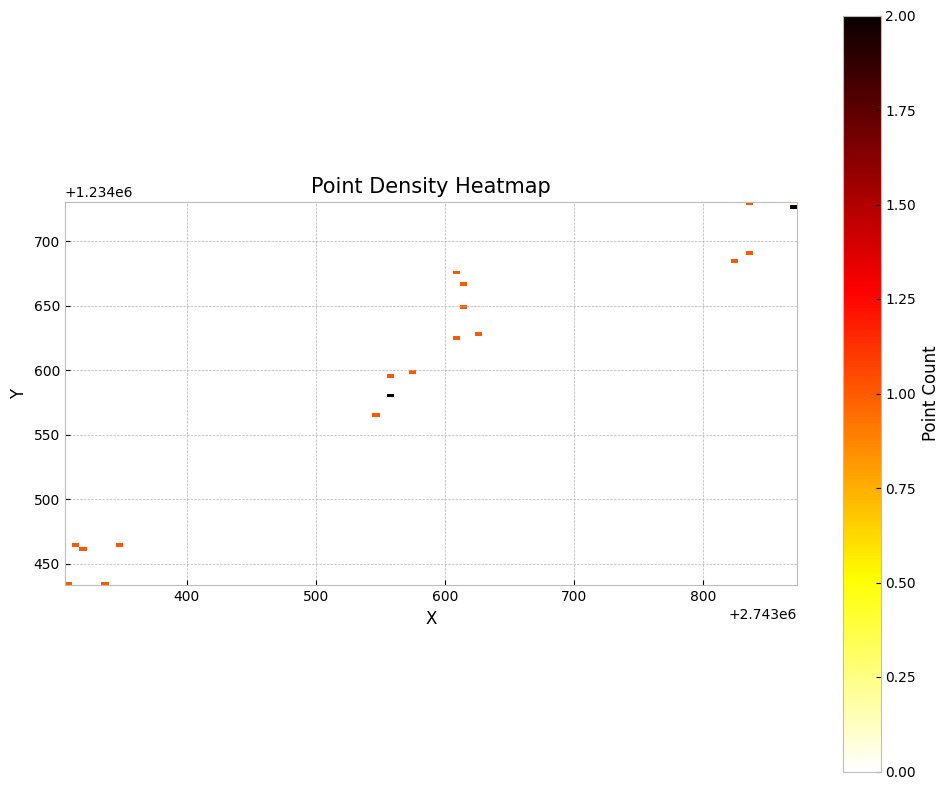

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


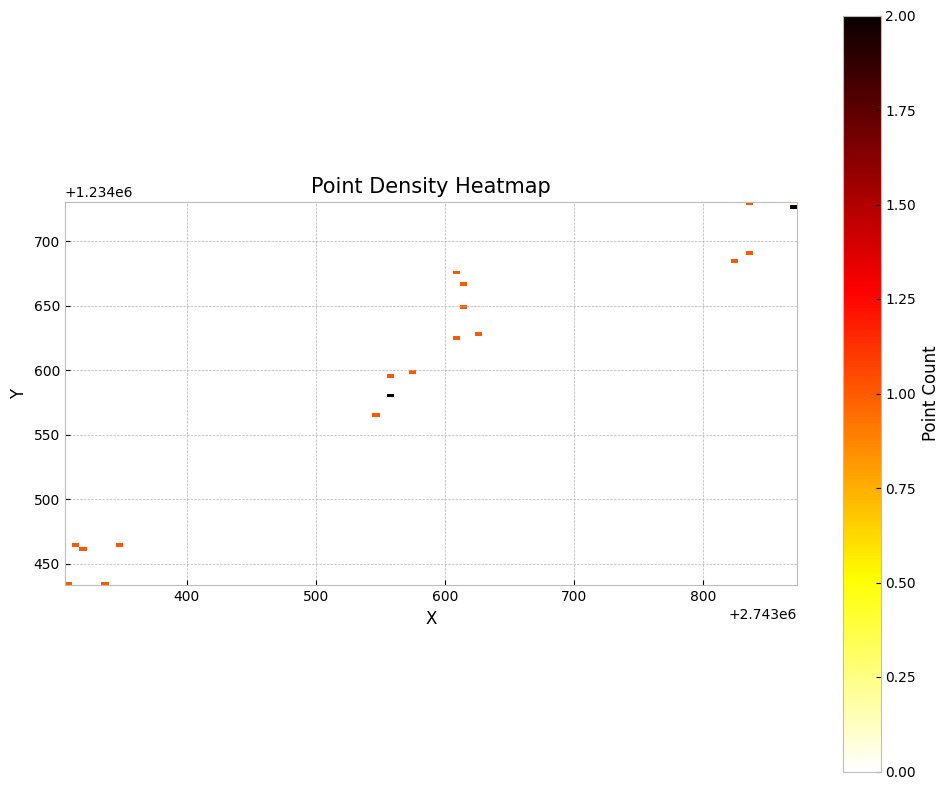

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


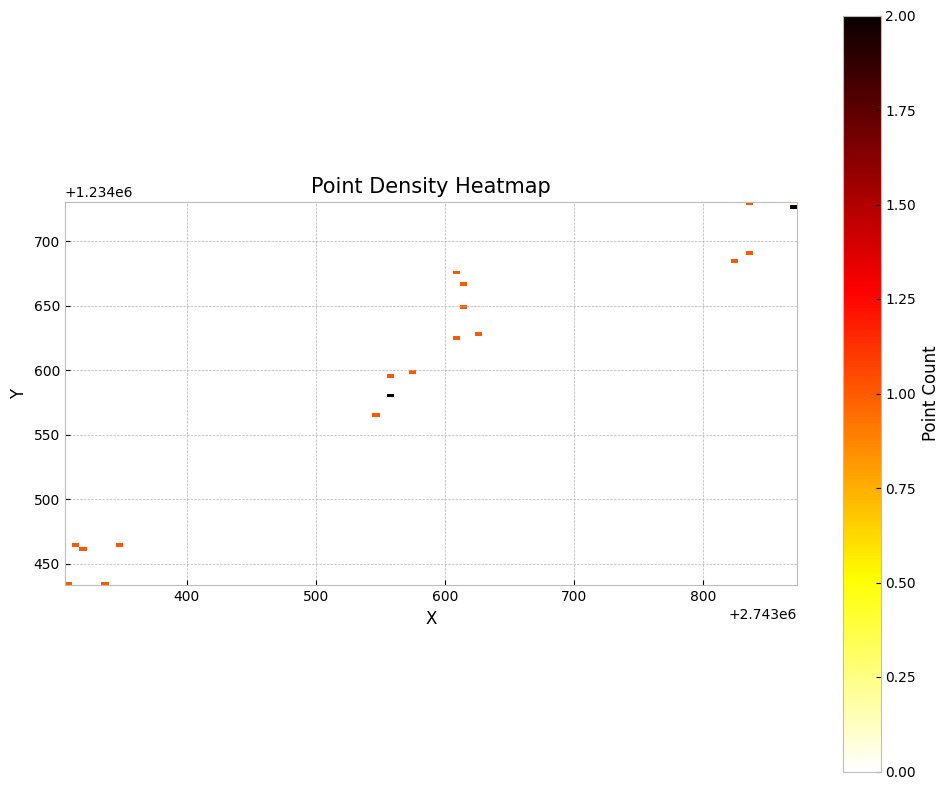

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


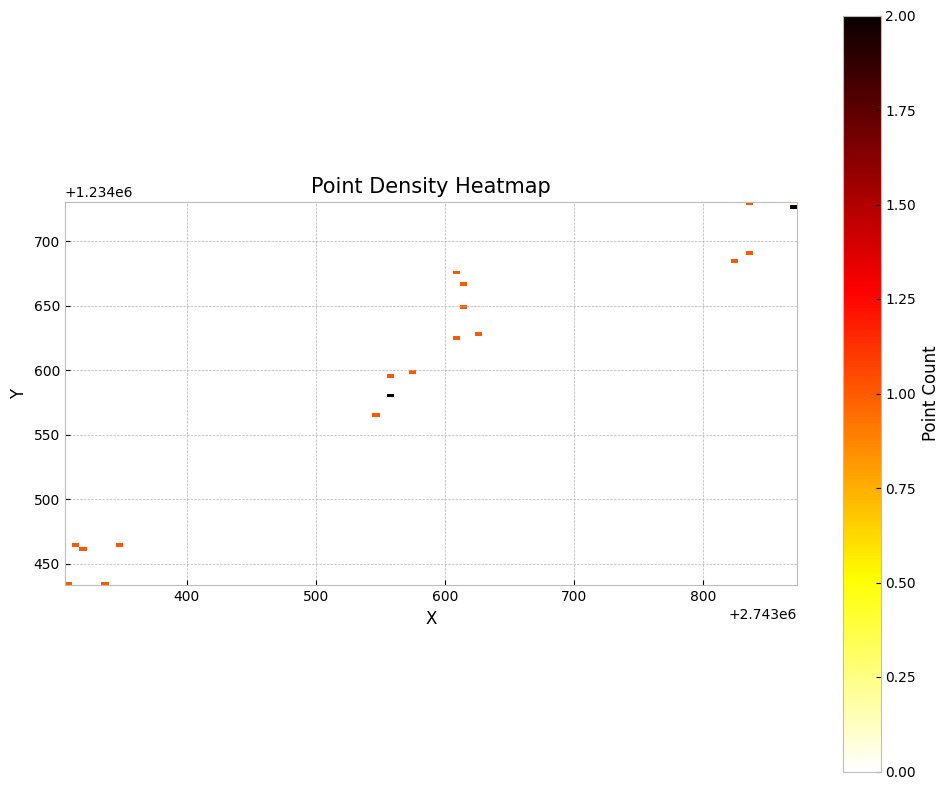

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


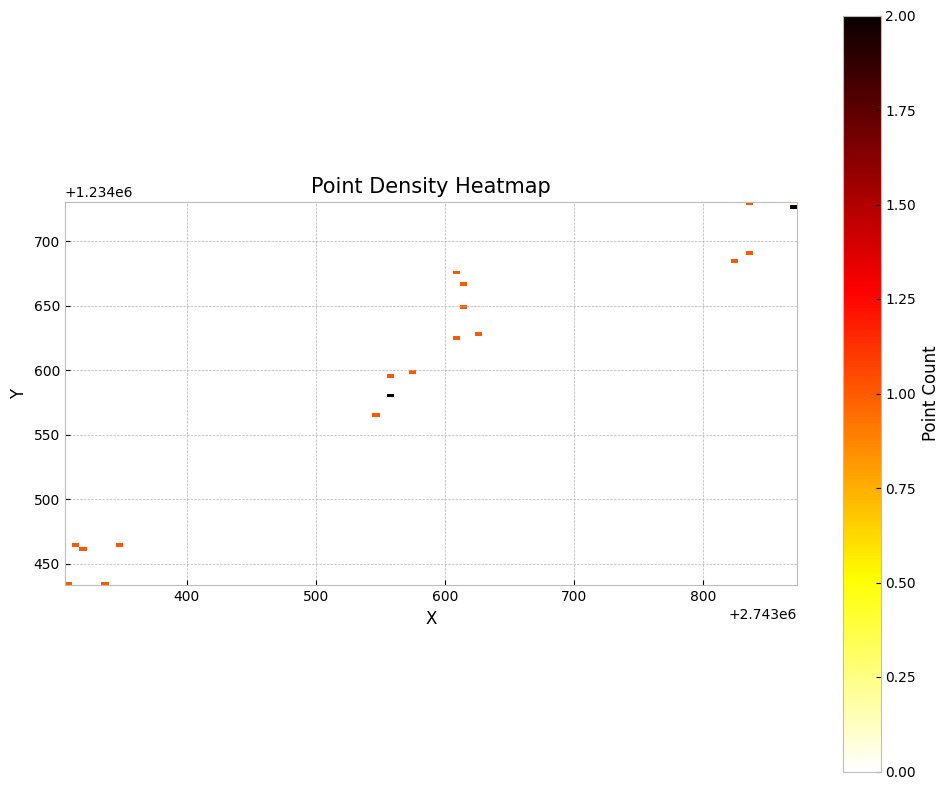

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


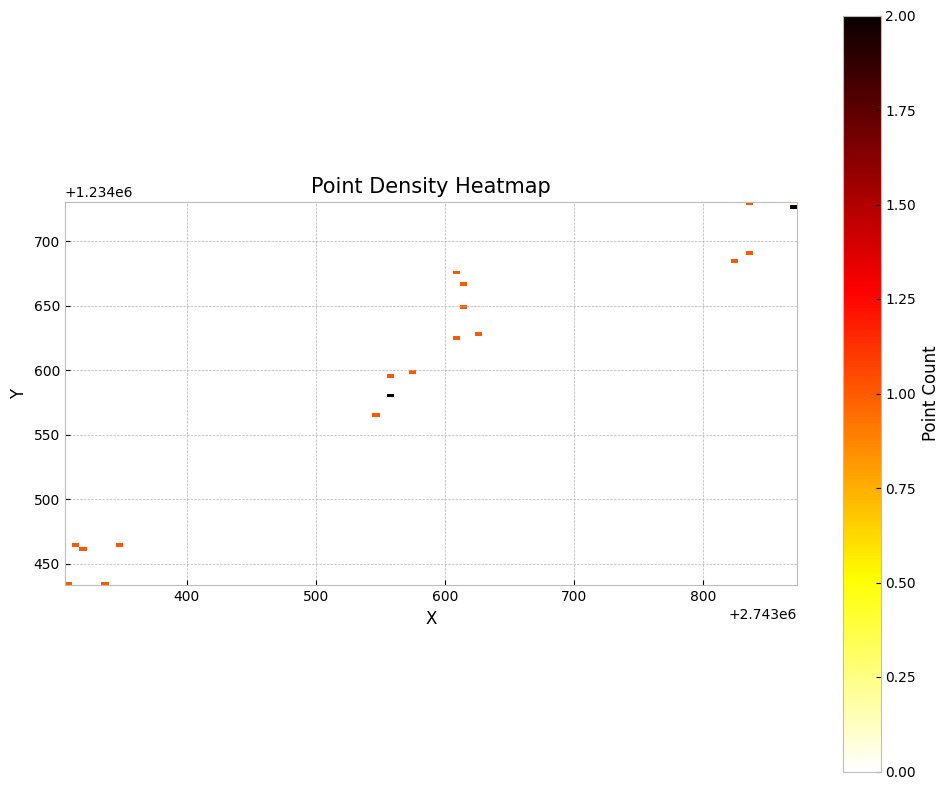

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


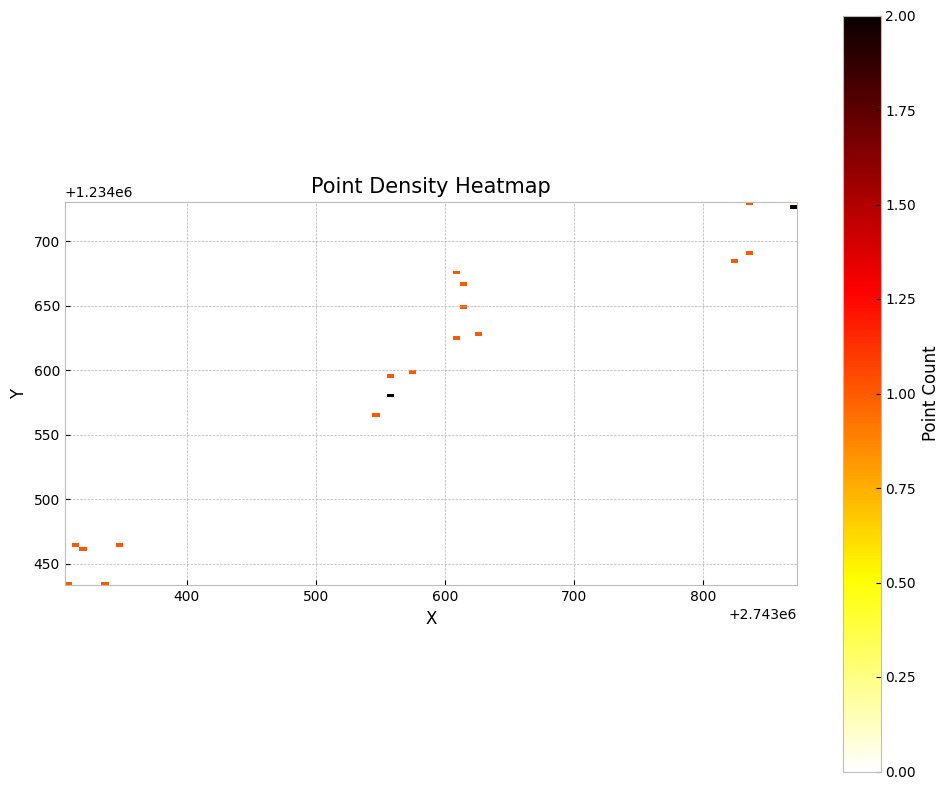

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


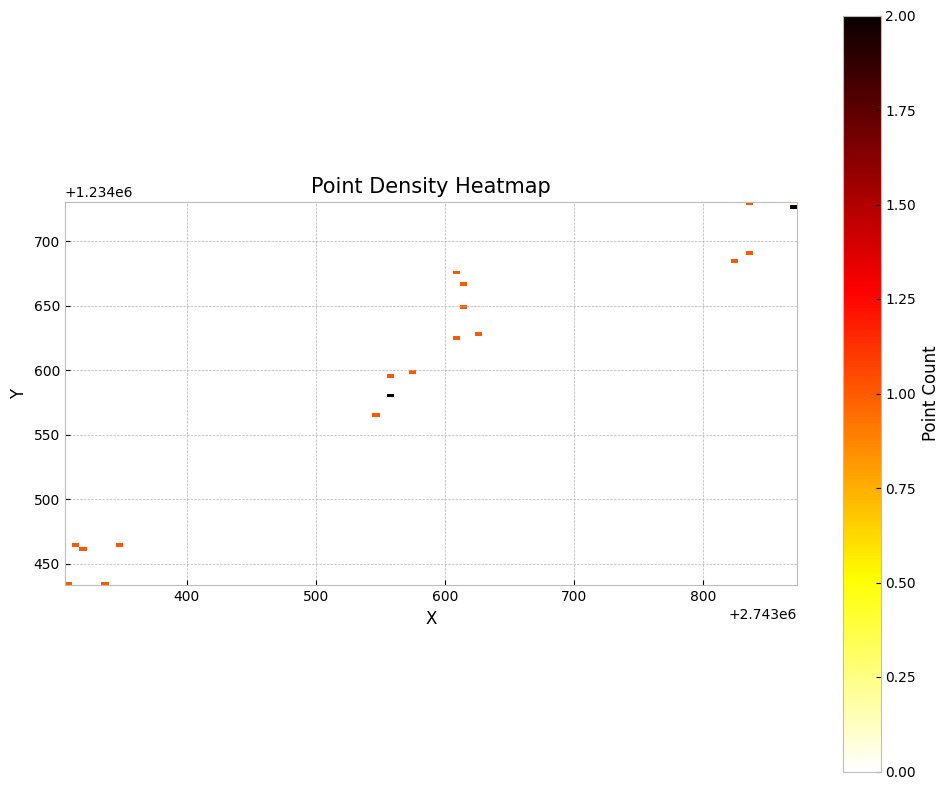

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


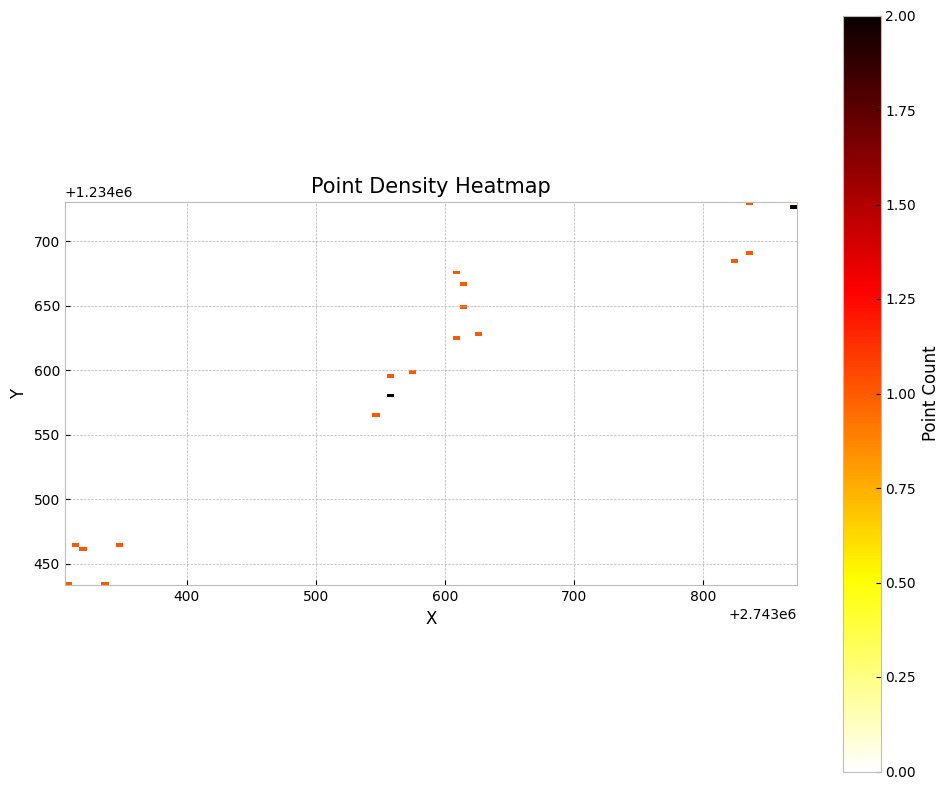

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


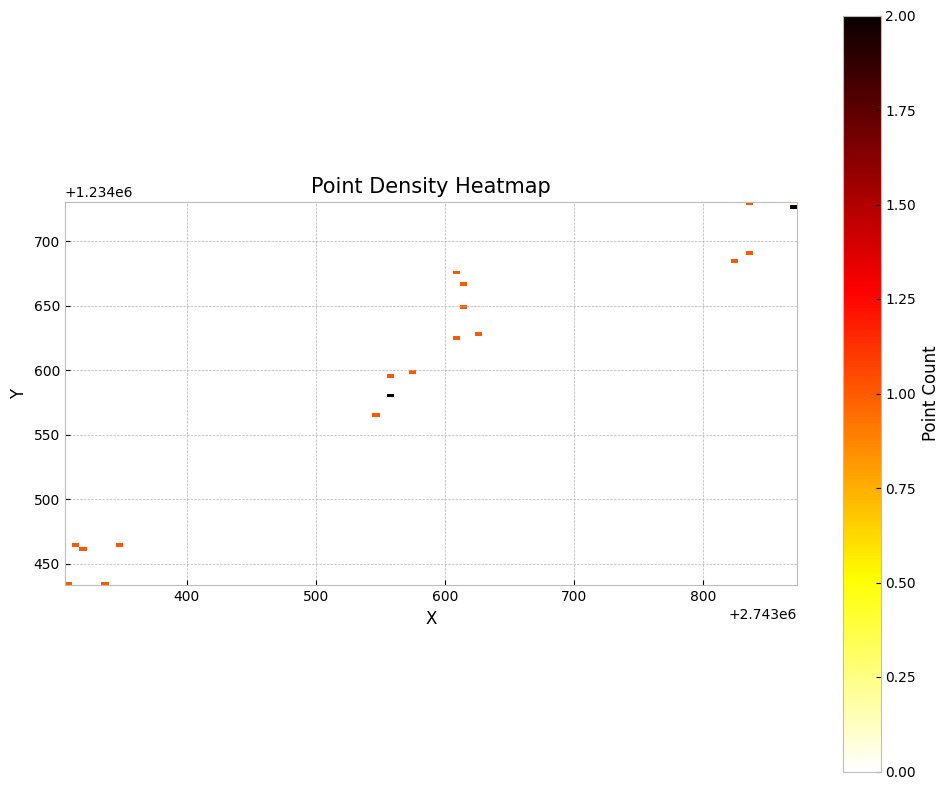

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


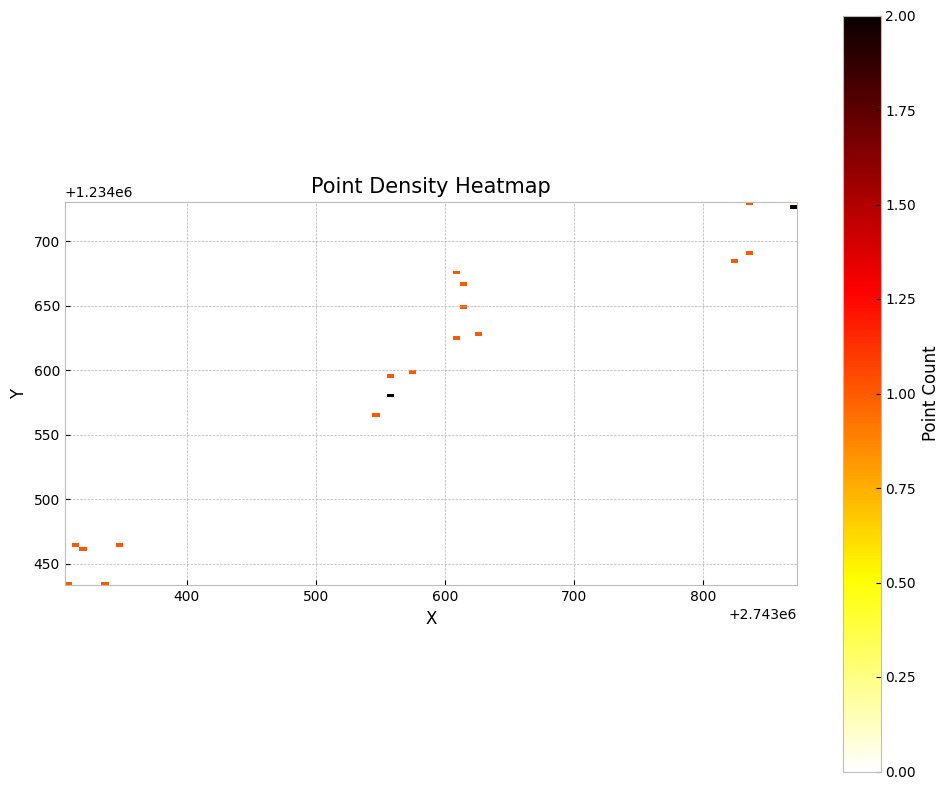

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


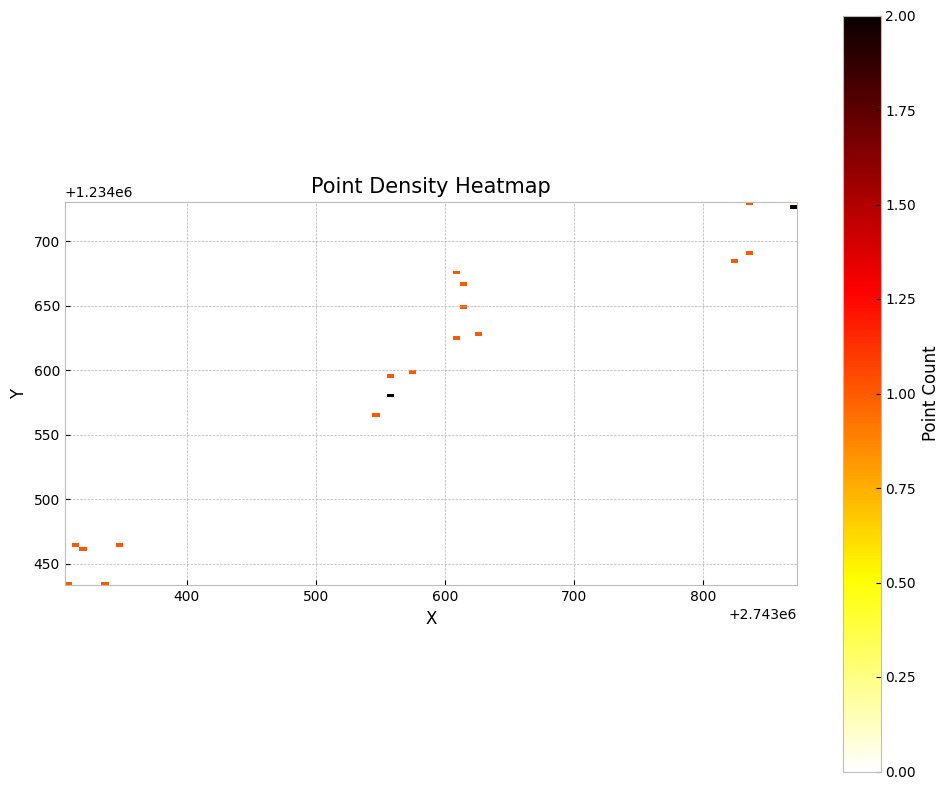

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


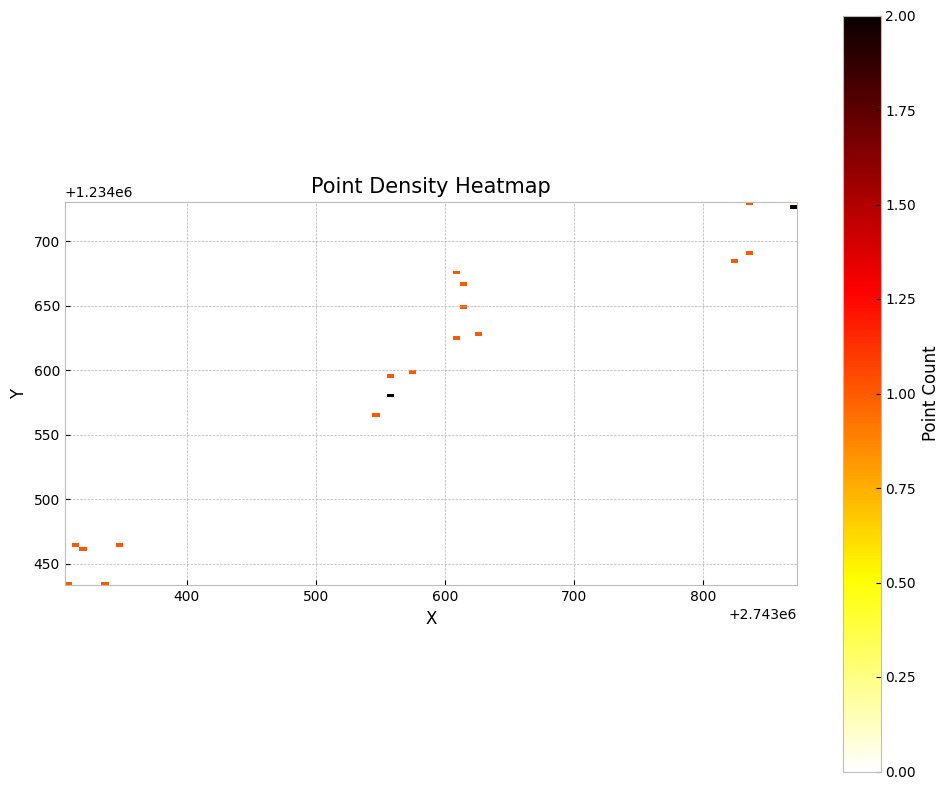

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


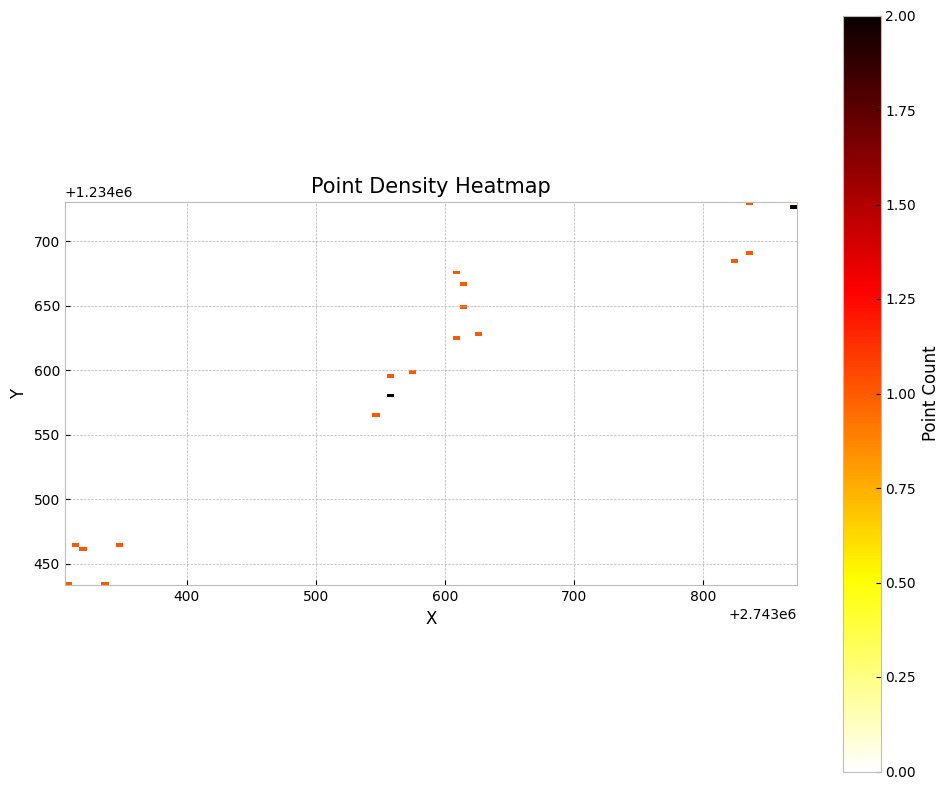

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


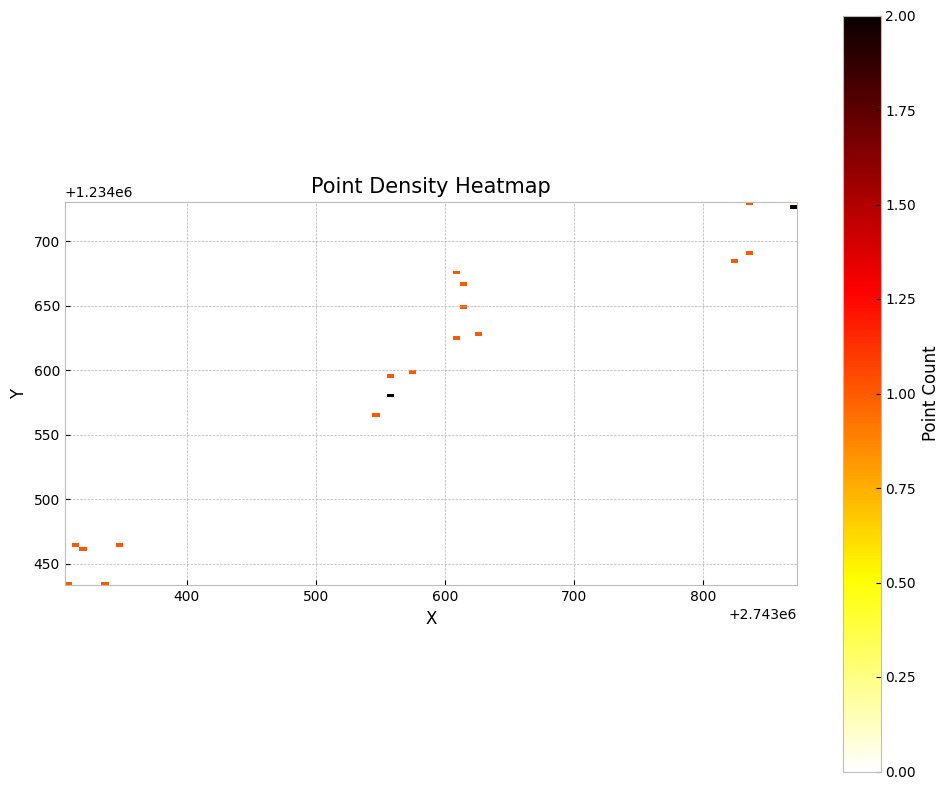

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


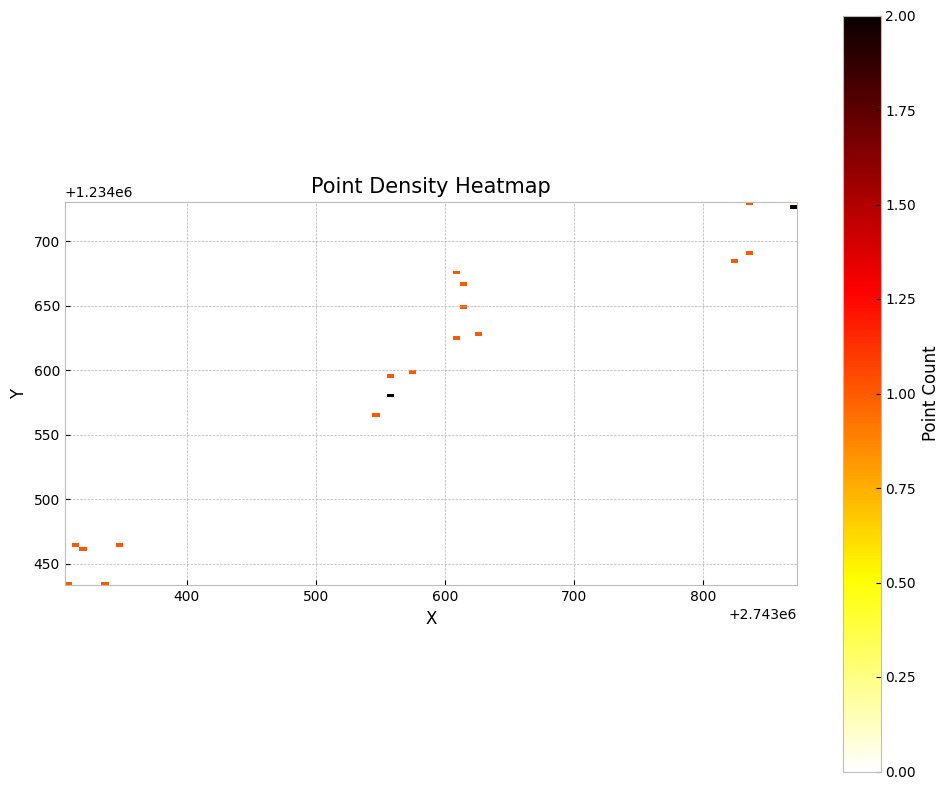

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


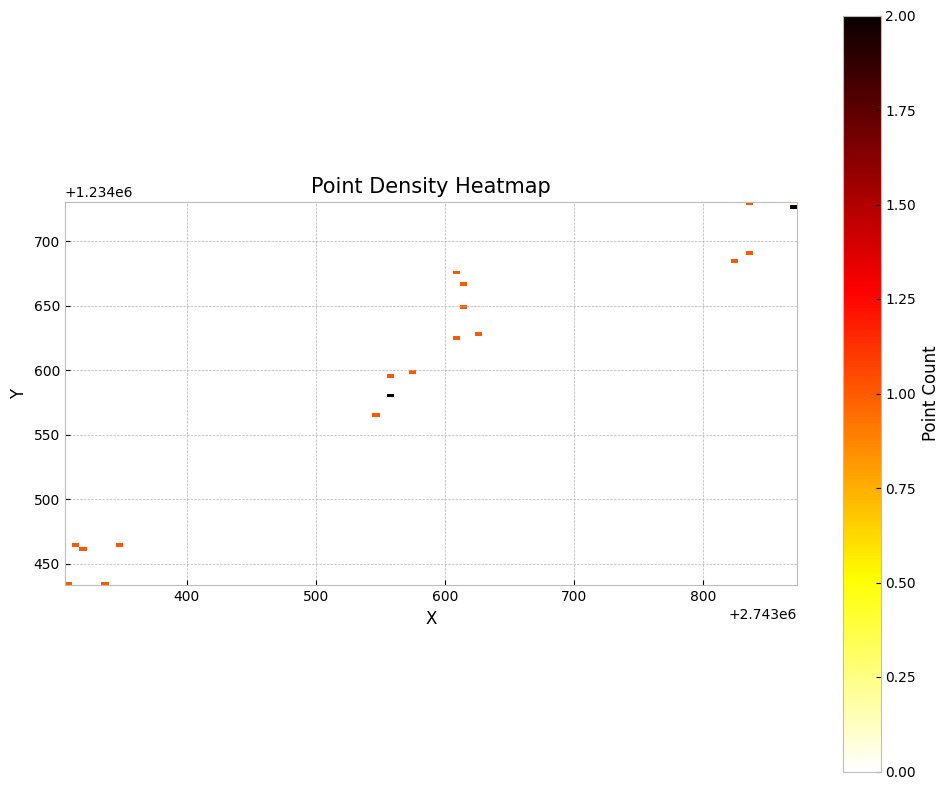

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


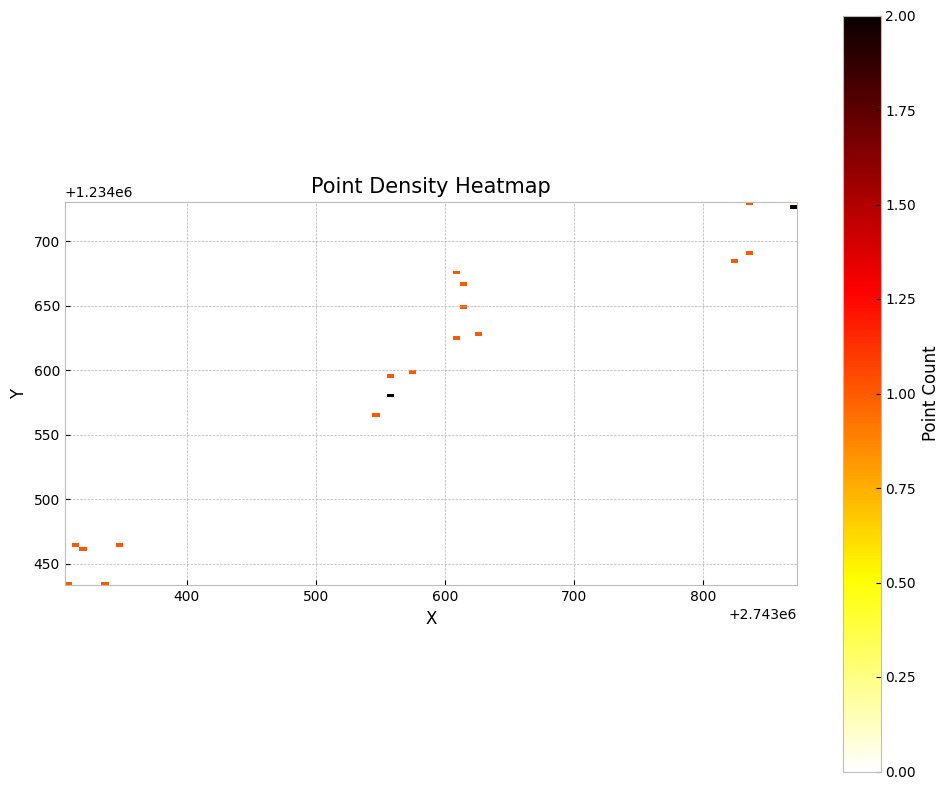

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


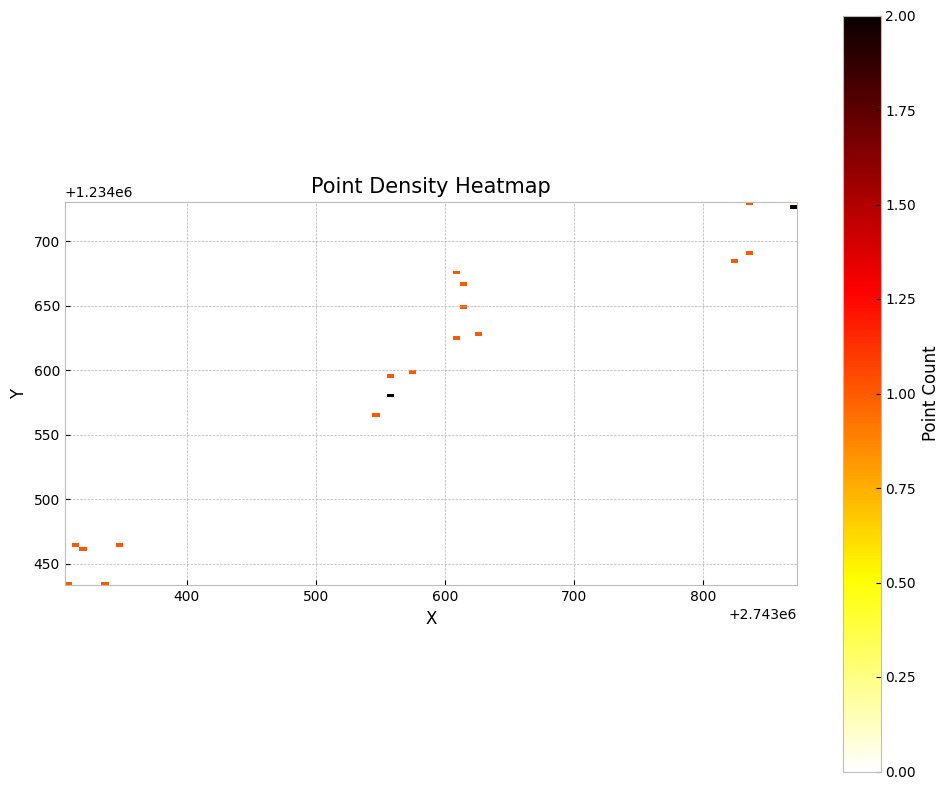

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


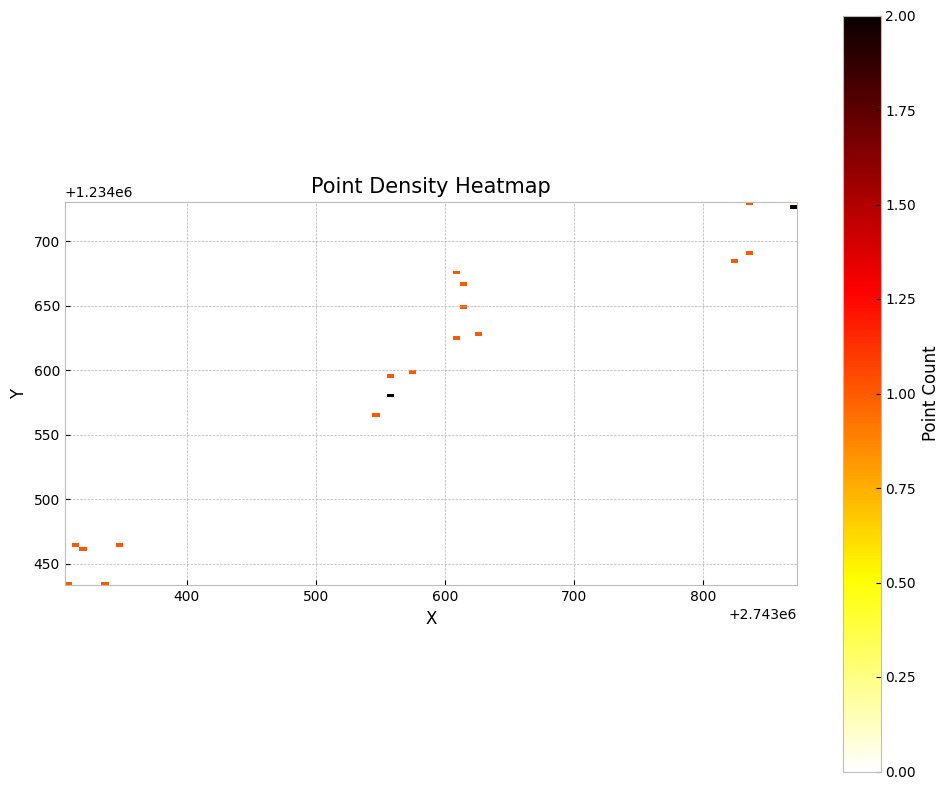

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


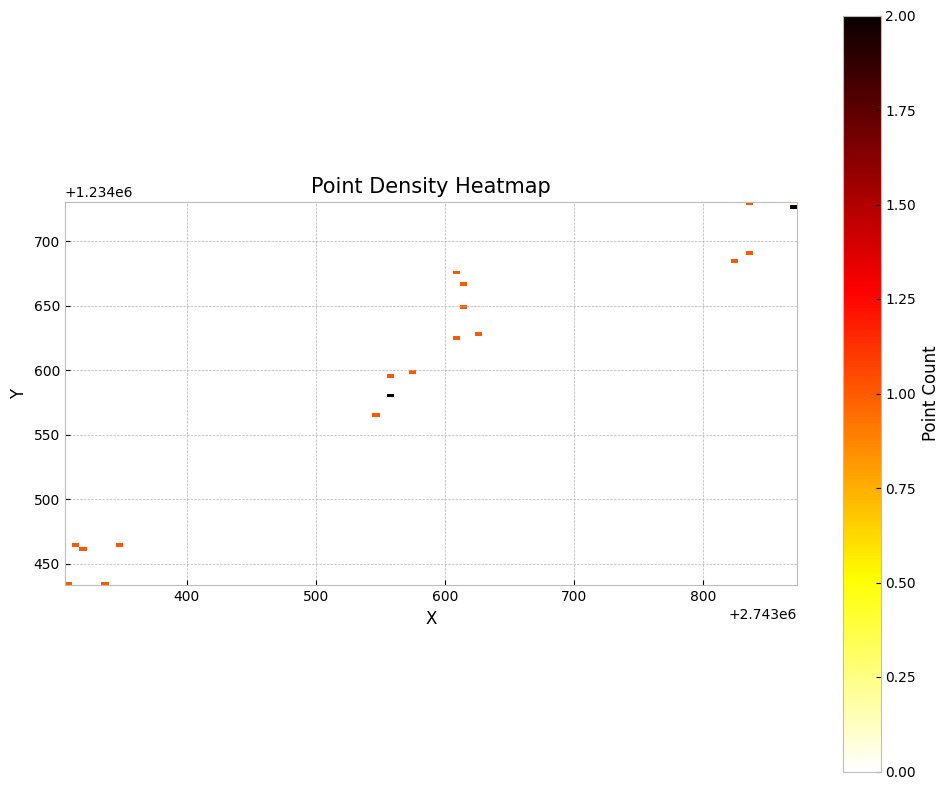

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


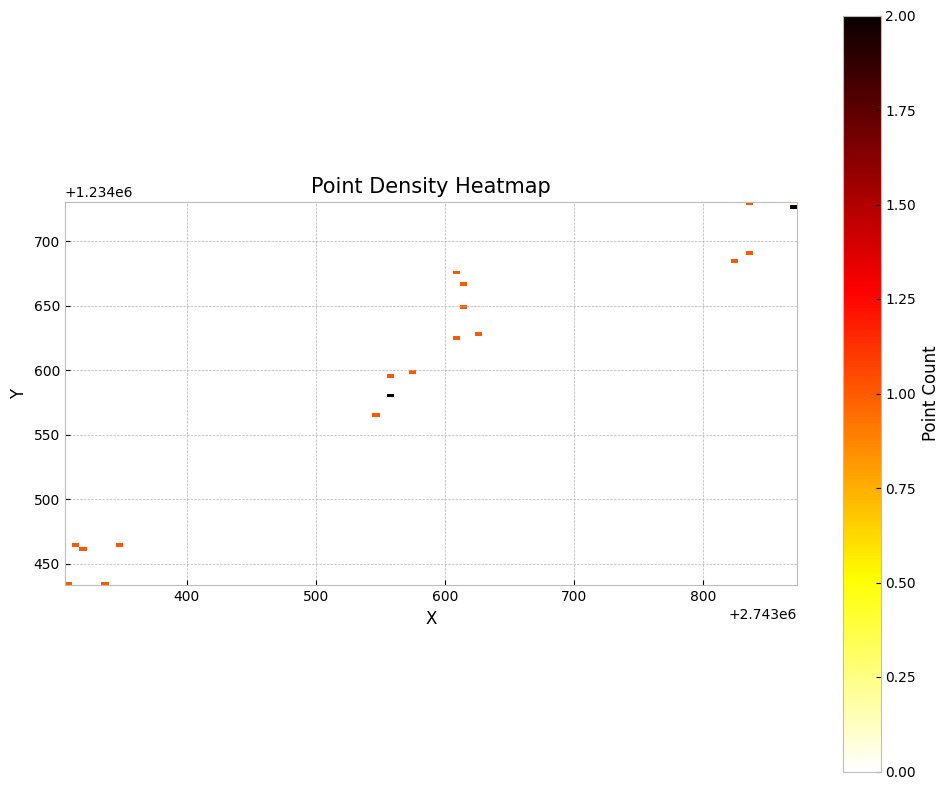

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


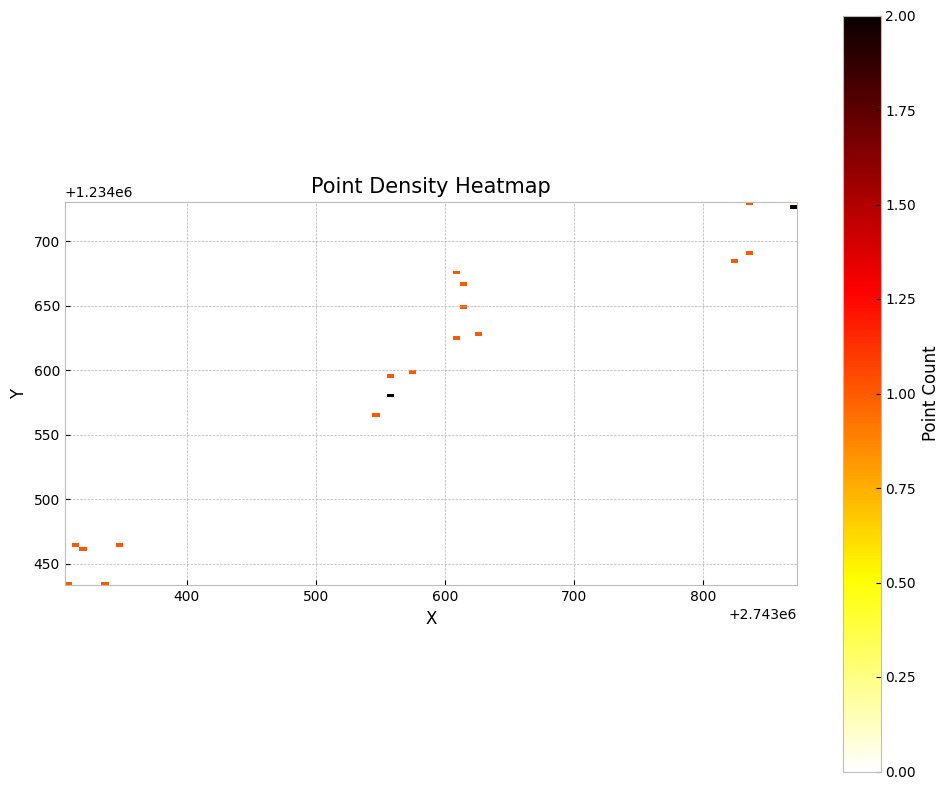

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


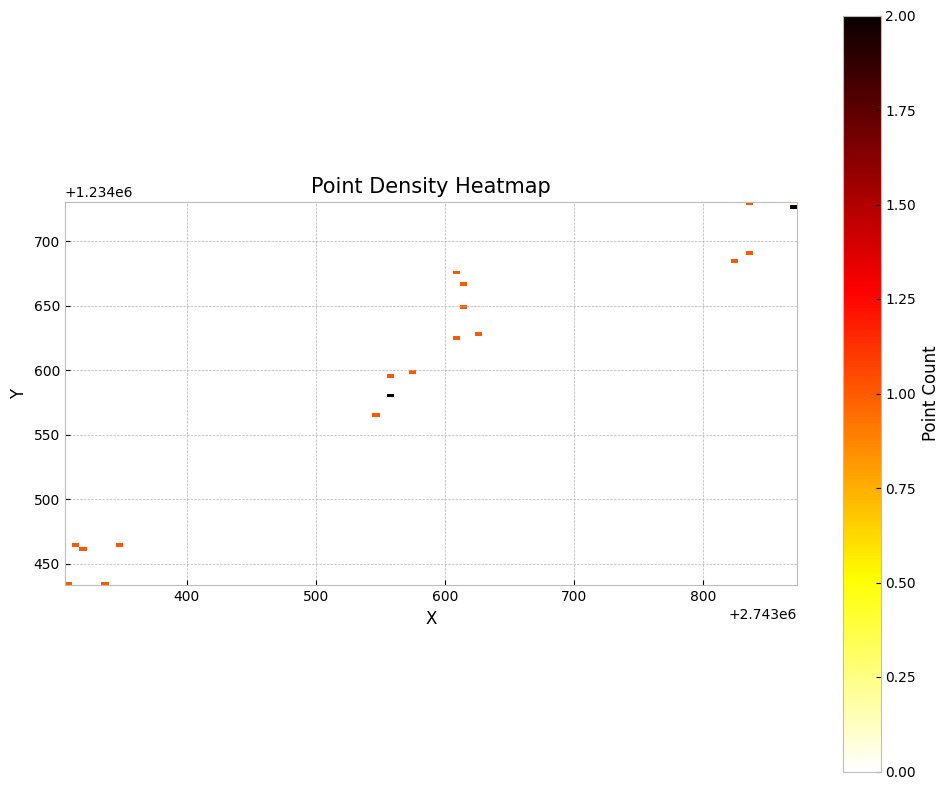

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


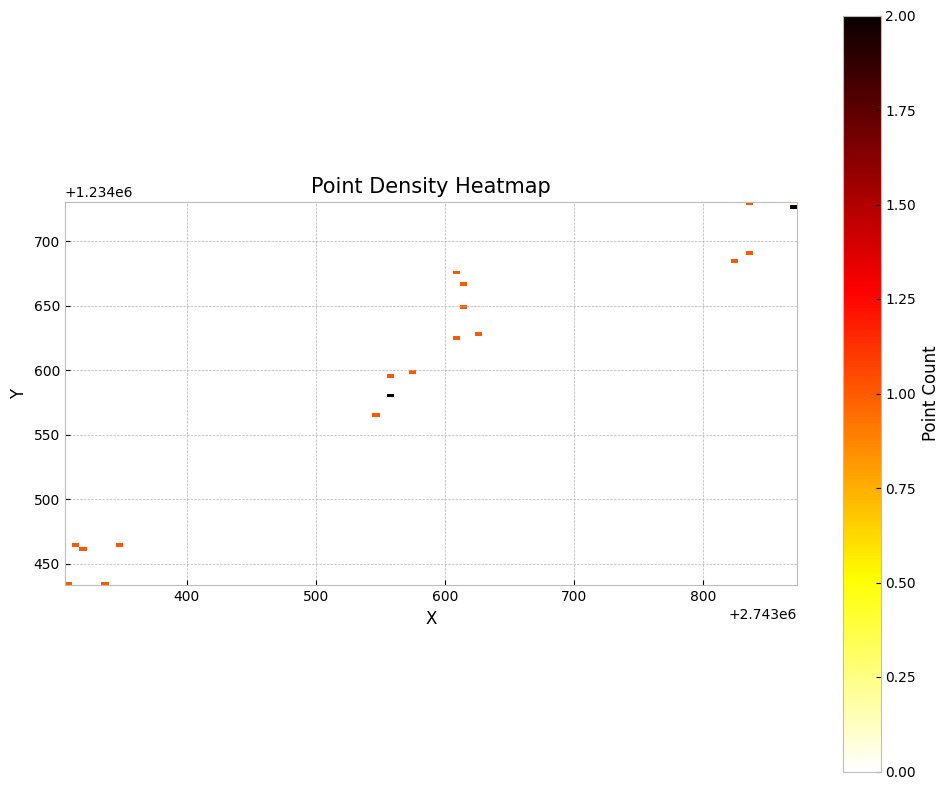

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


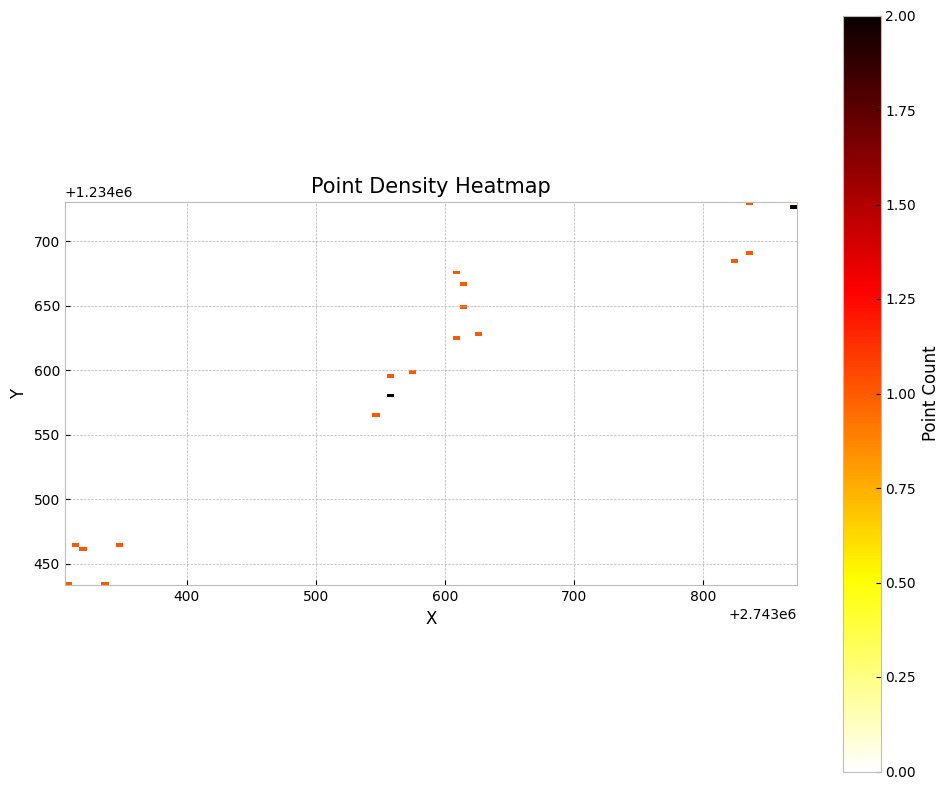

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


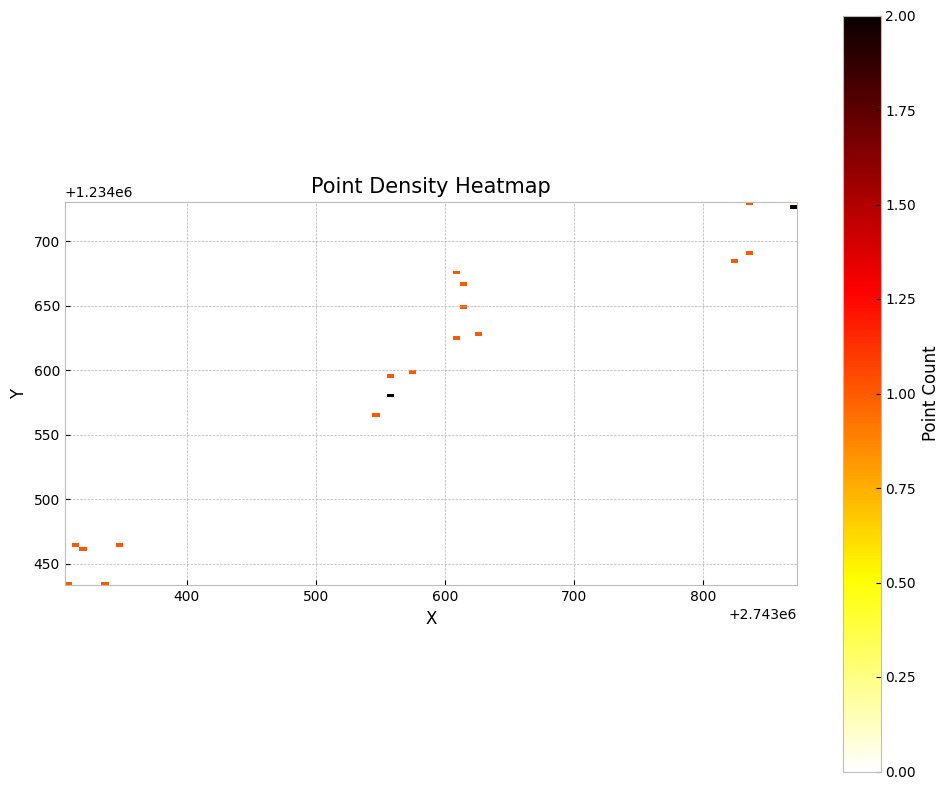

<Figure size 640x480 with 0 Axes>

In [ ]:
# /c:/Users/Rokas/Documents/Airidas/Matom ai/point_density_heatmap.py
# 1. Create point density heatmap
# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Using existing point_df for visualization...
Sampling 100,000 points for visualization
Visualizing 100,000 points


ValueError: setting an array element with a sequence.

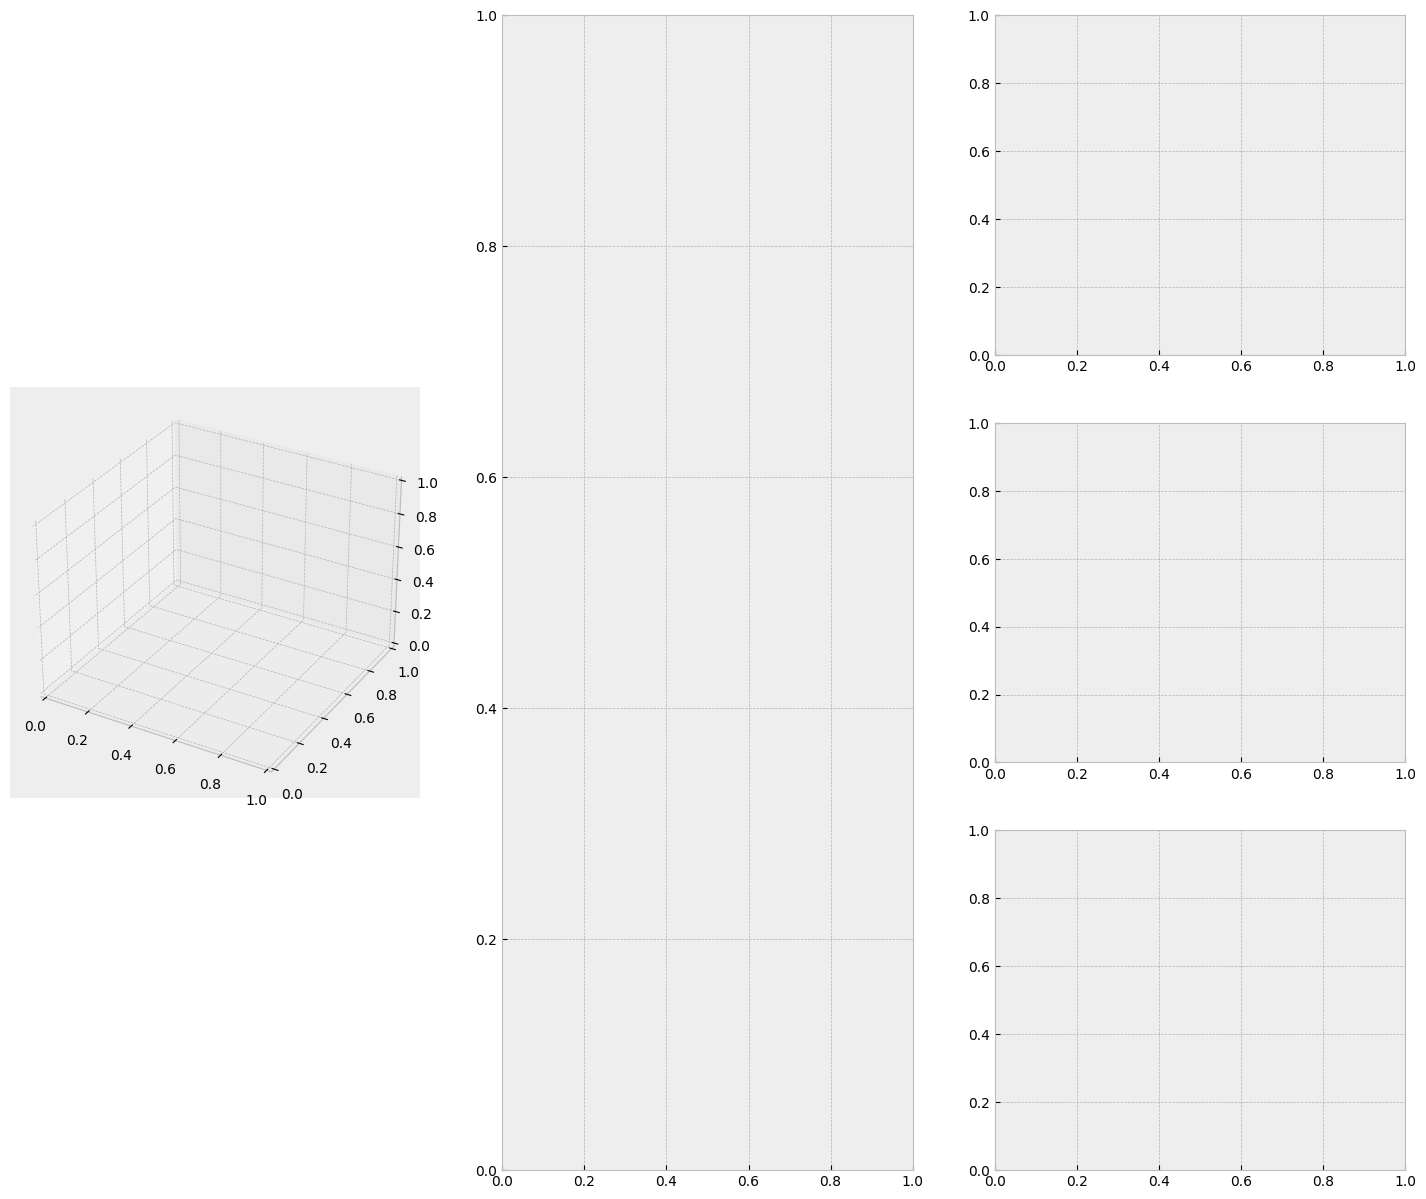

In [48]:
# Create a visualization of the LiDAR data

# Check if we have already created point_df
if 'point_df' not in globals() or df is None:
    print("Extracting individual points from the dataframe...")
    # Use the extract_points_from_df function defined in cell 14
    
    

# Visualize the data using the function defined earlier
# The df contains nested arrays, so we need to create a flattened version for visualization
if 'point_df' not in globals():
    print("Creating point dataframe for visualization...")
    
    fig = visualize_lidar(df, sample_size=100_000)
else:
    print("Using existing point_df for visualization...")
    fig = visualize_lidar(df, sample_size=100_000)
plt.show()

# Display summary information about the point cloud
print(f"\nVisualization complete. Data summary:")
print(f"- Total points in visualization: {len(df):,}")
print(f"- X range: {df['X'].min()} to {df['X'].max()}")
print(f"- Y range: {df['Y'].min()} to {df['Y'].max()}")
print(f"- Z range: {df['Z'].min()} to {df['Z'].max()}")

if 'classification' in df.columns:
    class_counts = df['classification'].value_counts()
    print(f"- Classification counts: {dict(class_counts)}")

In [42]:
# Analyze Data Structure Issues
print("Analyzing LiDAR dataframe structure...")
print(f"Total rows in dataframe: {len(df):,}")

# Check for nested structures in the first row
sample_row = df.iloc[0]
print("\nData structure in first row:")
for col in ['X', 'Y', 'Z']:
    if isinstance(sample_row[col], (list, np.ndarray)):
        print(f"- {col}: Nested structure with {len(sample_row[col])} elements")
    else:
        print(f"- {col}: Single value: {sample_row[col]}")

# Check format of coordinates to determine how to prepare for visualization
print("\nAnalyzing coordinate structure:")
if isinstance(df['X'].iloc[0], (list, np.ndarray)) and len(df['X'].iloc[0]) > 0:
    print("Data has nested coordinates - need to extract individual points")
    
    # Check how deep the nesting goes (single or double nested)
    if isinstance(df['X'].iloc[0][0], (list, np.ndarray)):
        print("Double-nested coordinates detected [[x], [y], [z]]")
        nesting_level = 2
    else:
        print("Single-nested coordinates detected [x, y, z]")
        nesting_level = 1
    
    print(f"\nSample X values: {df['X'].iloc[0][:3]}...")
    print(f"Sample Y values: {df['Y'].iloc[0][:3]}...")
    print(f"Sample Z values: {df['Z'].iloc[0][:3]}...")
else:
    print("Data has direct coordinate values")
    nesting_level = 0

Analyzing LiDAR dataframe structure...
Total rows in dataframe: 2,000,000

Data structure in first row:
- X: Single value: <ScaledArrayView([2743200.47 2743003.94 2743722.21 ... 2743137.01 2743387.94 2743656.63])>
- Y: Single value: <ScaledArrayView([1234606.6  1234803.03 1234970.3  ... 1234652.14 1234396.79 1234222.58])>
- Z: Single value: <ScaledArrayView([2058.45 2067.27 2214.89 ... 2036.06 2027.43 1960.52])>

Analyzing coordinate structure:
Data has direct coordinate values


In [ ]:
# Adjust sample_size if your computer struggles with the visualization
fig = visualize_lidar(df, sample_size=100_000)
plt.show()

TypeError: 'DataFrame' object is not callable

In [21]:
# Fix the dataframe structure before visualization
# The dataframe appears to have columns that contain lists instead of individual values
# Let's extract and create a proper point cloud dataframe

def extract_points_from_df(df_input, max_points=100_000):
	"""Extract individual points from a DataFrame with list columns"""
	print("Converting list-based dataframe to point-based dataframe...")
	
	# Initialize empty lists for each dimension
	x_points, y_points, z_points = [], [], []
	intensity_points, classification_points = [], []
	
	# Sample rows to limit total points
	if len(df_input) * len(df_input['X'].iloc[0]) > max_points:
		sample_rows = min(len(df_input), max_points // len(df_input['X'].iloc[0]))
		df_sample = df_input.sample(sample_rows, random_state=42)
	else:
		df_sample = df_input
	
	# Extract points from each row
	for idx, row in df_sample.iterrows():
		for i in range(len(row['X'])):
			x_points.append(row['X'][i])
			y_points.append(row['Y'][i])
			z_points.append(row['Z'][i])
			
			# Add other attributes if they are lists
			if isinstance(row['intensity'], (list, np.ndarray)):
				intensity_points.append(row['intensity'][i])
			else:
				intensity_points.append(row['intensity'])
				
			if isinstance(row['classification'], (list, np.ndarray)):
				classification_points.append(row['classification'][i])
			elif 'classification' in row:
				classification_points.append(row['classification'])
	
	# Create new dataframe with individual points
	point_df = pd.DataFrame({
		'X': x_points,
		'Y': y_points,
		'Z': z_points,
		'intensity': intensity_points,
	})
	
	if classification_points:
		point_df['classification'] = classification_points
		
	print(f"Created point-based dataframe with {len(point_df):,} points")
	return point_df

# Extract individual points and visualize
point_df = extract_points_from_df(df, max_points=500_000)
fig = visualize_lidar(point_df, sample_size=100_000)
plt.show()

Converting list-based dataframe to point-based dataframe...
Created point-based dataframe with 20 points
Visualizing 20 points


ValueError: Invalid RGBA argument: masked_array(data=[0.993248, 0.906157, 0.143936, array([0.18])],
             mask=False,
       fill_value=np.str_('?'),
            dtype=object)

<Figure size 1800x1500 with 8 Axes>

## Create Additional Specialized Visualizations

Now let's create some more specialized visualizations focusing on specific aspects of the data:

In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_density_heatmap(df, resolution=100):
    """Create a 2D heatmap of point density"""
    # Ensure we have a clean dataframe with numerical X,Y values
    df_clean = df[['X', 'Y']].copy()
    
    # Drop any NaN values
    df_clean = df_clean.dropna()
    
    # Sample if dataset is large
    if len(df_clean) > 1_000_000:
        df_sample = df_clean.sample(1_000_000, random_state=42)
    else:
        df_sample = df_clean
        
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create 2D histogram
    h = ax.hist2d(df_sample['X'], df_sample['Y'], 
                 bins=resolution, cmap='hot_r')
    
    ax.set_title('Point Density Heatmap', fontsize=15)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_aspect('equal')
    
    # Add colorbar (h[3] is the colorbar mappable object)
    cbar = fig.colorbar(h[3], ax=ax)
    cbar.set_label('Point Count')
    
    plt.tight_layout()
    return fig

def flatten_nested_points(df):
    """Extract points from dataframe that may contain nested arrays"""
    flat_data = {'X': [], 'Y': []}
    
    for _, row in df.iterrows():
        if isinstance(row['X'], (list, np.ndarray)):
            # Handle lists/arrays
            for j in range(len(row['X'])):
                x_val = row['X'][j]
                y_val = row['Y'][j]
                # Handle nested arrays (getting first element if array)
                x = x_val[0] if isinstance(x_val, (list, np.ndarray)) else x_val
                y = y_val[0] if isinstance(y_val, (list, np.ndarray)) else y_val
                
                if isinstance(x, (int, float)) and isinstance(y, (int, float)):
                    flat_data['X'].append(x)
                    flat_data['Y'].append(y)
        else:
            # Handle non-nested values
            if isinstance(row['X'], (int, float)) and isinstance(row['Y'], (int, float)):
                flat_data['X'].append(row['X'])
                flat_data['Y'].append(row['Y'])
    
    return pd.DataFrame(flat_data)

# Usage example (assuming point_df exists)
def create_and_display_heatmap(point_df):
    # Check if we need to flatten the dataframe
    needs_flattening = False
    sample_size = min(10, len(point_df))
    
    for i in range(sample_size):
        if isinstance(point_df['X'].iloc[i], (list, np.ndarray)):
            needs_flattening = True
            break
    
    if needs_flattening:
        print("Detected nested arrays, flattening data...")
        flat_df = flatten_nested_points(point_df)
        print(f"Created flat dataframe with {len(flat_df):,} points")
        density_fig = create_density_heatmap(flat_df)
    else:
        density_fig = create_density_heatmap(point_df)
    
    plt.show()
    return density_fig

Using existing point_df for density heatmap...
Detected nested arrays, flattening data...
Created flat dataframe with 20 points


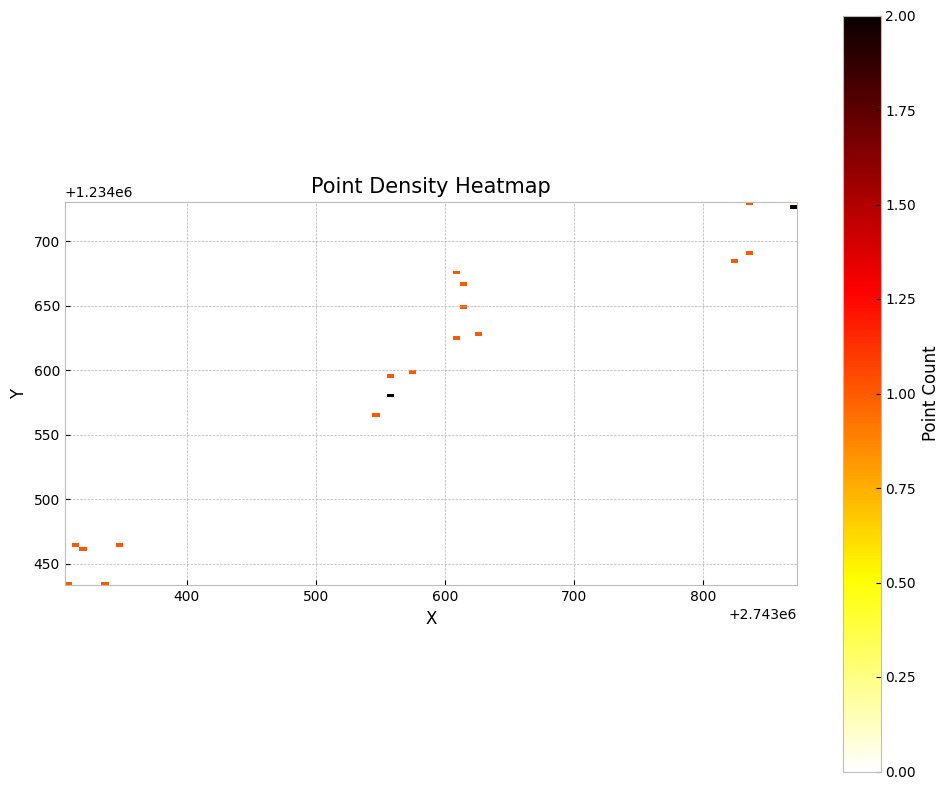

<Figure size 640x480 with 0 Axes>

In [50]:

# Use the density heatmap functions defined above

# Check if the point_df exists and is already processed
if 'point_df' in globals():
    print("Using existing point_df for density heatmap...")
    # Check if we need to further flatten data
    density_fig = create_and_display_heatmap(point_df)
else:
    print("Creating point dataframe for density heatmap...")
    # Create point dataframe from the list-based dataframe
    point_df = extract_points_from_df(df, max_points=500_000)
    density_fig = create_and_display_heatmap(point_df)

# Display the figure
plt.tight_layout()
plt.show()


Creating elevation profile with 4 points


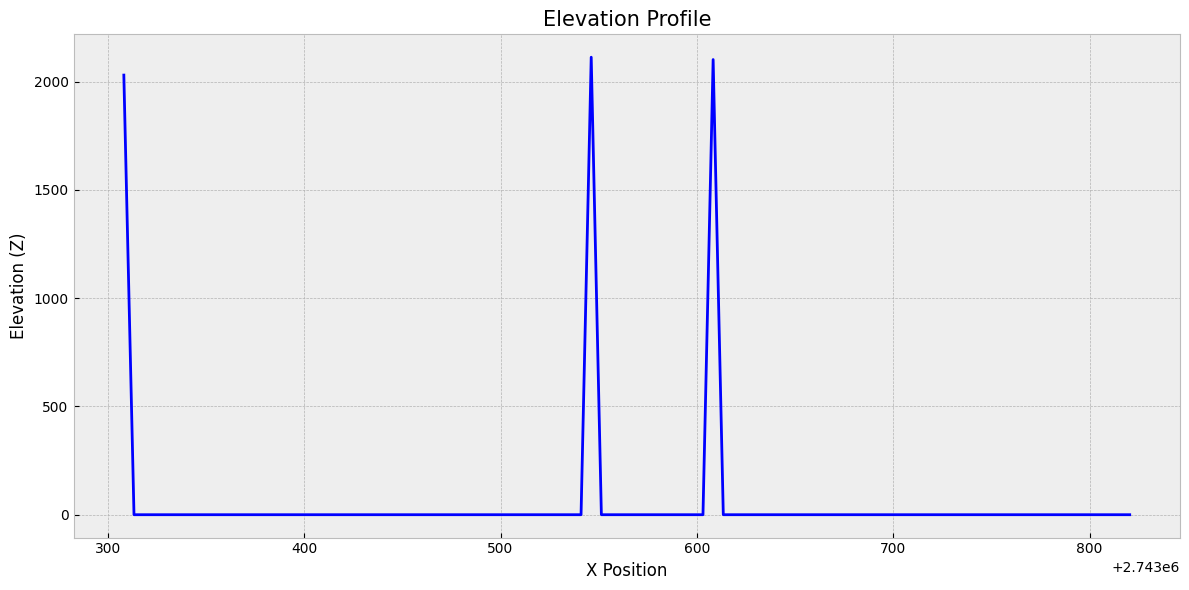

In [40]:
# 2. Create elevation profile (if Z represents elevation)
def create_elevation_profile(df, num_bins=100, sample_size=500_000):
    """Create an elevation profile along the X axis"""
    # Check if we have point-based dataframe or nested lists
    if isinstance(df['X'].iloc[0], (list, np.ndarray)):
        print("Input dataframe has nested arrays. Using the flattened point_df instead.")
        # Use the previously created point_df if it exists
        if 'point_df' in globals():
            df_to_use = point_df
        else:
            # Handle the case when we need to flatten the data
            flat_data = {'X': [], 'Z': []}
            for i, row in df.iterrows():
                if isinstance(row['X'], (list, np.ndarray)) and isinstance(row['Z'], (list, np.ndarray)):
                    for j in range(len(row['X'])):
                        if isinstance(row['X'][j], (list, np.ndarray)):
                            flat_data['X'].append(row['X'][j][0])  # Take first element if nested
                            flat_data['Z'].append(row['Z'][j][0])
                        else:
                            flat_data['X'].append(row['X'][j])
                            flat_data['Z'].append(row['Z'][j])
                else:
                    flat_data['X'].append(row['X'])
                    flat_data['Z'].append(row['Z'])
            df_to_use = pd.DataFrame(flat_data)
    else:
        df_to_use = df
        
    # Sample if needed
    if len(df_to_use) > sample_size:
        df_sample = df_to_use.sample(sample_size, random_state=42)
    else:
        df_sample = df_to_use
    
    # Make sure values are numeric
    df_sample = df_sample.copy()
    df_sample['X'] = pd.to_numeric(df_sample['X'], errors='coerce')
    df_sample['Z'] = pd.to_numeric(df_sample['Z'], errors='coerce')
    
    # Drop any rows with NaN values
    df_sample = df_sample.dropna()
    
    print(f"Creating elevation profile with {len(df_sample):,} points")
    
    # Group X values into bins and calculate statistics of Z within each bin
    x_min, x_max = df_sample['X'].min(), df_sample['X'].max()
    bin_edges = np.linspace(x_min, x_max, num_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Assign each point to a bin
    bins = np.digitize(df_sample['X'], bin_edges)
    
    # Calculate statistics for each bin
    min_z = np.zeros(num_bins)
    max_z = np.zeros(num_bins)
    mean_z = np.zeros(num_bins)
    
    for i in range(1, num_bins + 1):
        bin_points = df_sample[bins == i]
        if len(bin_points) > 0:
            min_z[i-1] = bin_points['Z'].min()
            max_z[i-1] = bin_points['Z'].max()
            mean_z[i-1] = bin_points['Z'].mean()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the elevation profile
    ax.fill_between(bin_centers, min_z, max_z, alpha=0.3, color='skyblue')
    ax.plot(bin_centers, mean_z, 'b-', linewidth=2)
    
    ax.set_title('Elevation Profile', fontsize=15)
    ax.set_xlabel('X Position', fontsize=12)
    ax.set_ylabel('Elevation (Z)', fontsize=12)
    ax.grid(True)
    
    plt.tight_layout()
    return fig

# Create and display the elevation profile
# Try using point_df which should be already flattened
if 'point_df' in globals():
    elevation_fig = create_elevation_profile(point_df)
else:
    elevation_fig = create_elevation_profile(df)
plt.show()

Visualizing point classifications...


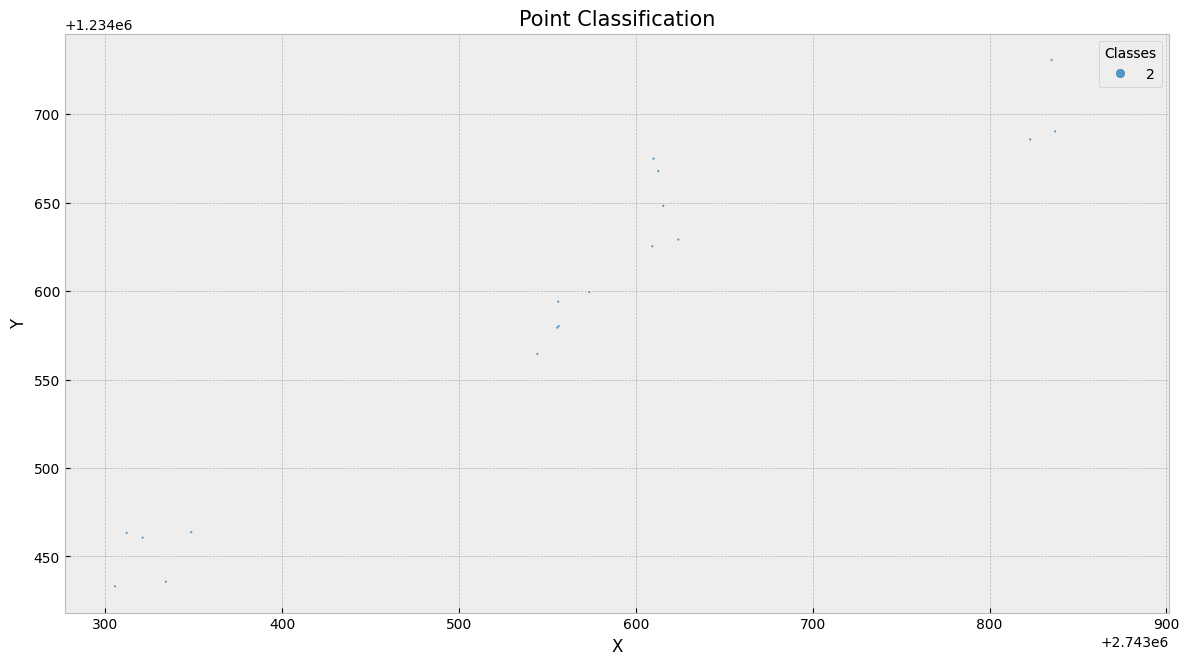

In [31]:
# 3. Visualize the classification (if available)
if 'classification' in df.columns:
    print("Visualizing point classifications...")
    
    # Use point_df which has properly structured data
    if 'point_df' in globals() and 'classification' in point_df.columns:
        df_to_use = point_df
    else:
        print("Using extract_points_from_df to prepare data for visualization")
        df_to_use = extract_points_from_df(df, max_points=500_000)
    
    # Sample for visualization if needed
    if len(df_to_use) > 500_000:
        df_viz = df_to_use.sample(500_000, random_state=42)
    else:
        df_viz = df_to_use
    
    # Check if X and Y are lists or arrays and flatten them if needed
    if isinstance(df_viz['X'].iloc[0], (list, np.ndarray)):
        print("Flattening nested X, Y values for visualization")
        x_values = []
        y_values = []
        class_values = []
        
        for i, row in df_viz.iterrows():
            if isinstance(row['X'], (list, np.ndarray)):
                if isinstance(row['X'][0], (list, np.ndarray)):  # Double nested
                    x_values.extend([x[0] for x in row['X']])
                    y_values.extend([y[0] for y in row['Y']])
                else:  # Single nested
                    x_values.extend(row['X'])
                    y_values.extend(row['Y'])
                
                # Handle classification - could be scalar or list
                if isinstance(row['classification'], (list, np.ndarray)):
                    if len(row['classification']) == len(row['X']):
                        class_values.extend(row['classification'])
                    else:
                        class_values.extend([row['classification']] * len(row['X']))
                else:
                    class_values.extend([row['classification']] * len(row['X']))
            else:
                x_values.append(row['X'])
                y_values.append(row['Y'])
                class_values.append(row['classification'])
        
        # Create a temporary dataframe for plotting
        plot_df = pd.DataFrame({
            'X': x_values,
            'Y': y_values,
            'classification': class_values
        })
    else:
        plot_df = df_viz
    
    # Now plot the data
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Get unique classifications and assign colors
    unique_classes = np.unique(plot_df['classification'])
    
    # Use scatter plot with different colors for each class
    scatter = ax.scatter(plot_df['X'], plot_df['Y'], 
                       c=plot_df['classification'], cmap='tab20', s=1, alpha=0.7)
    
    ax.set_title('Point Classification', fontsize=15)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_aspect('equal')
    
    # Add legend (only if there are not too many classes)
    if len(unique_classes) <= 20:
        legend1 = ax.legend(*scatter.legend_elements(),
                          loc="upper right", title="Classes")
        ax.add_artist(legend1)
    
    plt.tight_layout()
    plt.show()

## Export Processed Data (Optional)

If you want to save the processed data to a CSV or similar format for use in other applications:

In [ ]:
# You can save the DataFrame to CSV (useful for smaller datasets)
# df.to_csv('../data/processed_lidar_points.csv', index=False)

# For large datasets, consider using a more efficient format like parquet
# df.to_parquet('../data/processed_lidar_points.parquet')